# HR Employee Attrition Analysis 

# Problem statement

Prepare a model for the HR department to predict the Attrition and give the insights and suggestions 
about the factors associated with the attrition, so that HR can take preventive measure to reduce 
Attrition.

### Import Basic Libraries :

In [1]:
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
fit_rf = RandomForestClassifier(random_state=42)
import warnings
warnings.filterwarnings('ignore')

In [2]:
original_data=pd.read_csv("HR_Employee_Attrition_Data.csv")

In [3]:
df=original_data.copy()
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               3   
3                 3          4  Life Sciences              1               4   
4                 2          1        Medical              1               5   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     2466
Yes     474
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
________________________________________________________________

# observation:
(1)No missing value
(2)24 attributes are int/float and 10 are object types

In [8]:
pd.set_option('display.max_columns',50)
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               3   
3                 3          4  Life Sciences              1               4   
4                 2          1        Medical              1               5   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [9]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  2940.000000  2940.000000       2940.000000  2940.000000         2940.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.133819   403.440447          8.105485     1.023991            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     2940.000000              2940.000000  2940.000000     2940.000000   
mean      1470.500000                 2.721769    65.891156        2.729932   
std        848.849221                 1.092896    20.325969        0.711440   
min          1.000000                 1.000000    30.000000        1.000000   
25%        735.750000                 2.000000    48.000000        2.000000   
50%       1470.500000                 3.000000    66.000000        3.000000   
75%       2205.250000                 4.000000    84.000000        3.000000   
max       2940.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  2940.000000      2940.000000    2940.000000   2940.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106752         1.102658    4707.155770   7116.575021   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8045.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8380.000000  20462.000000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         2940.000000        2940.000000        2940.000000   
mean             2.693197          15.209524           3.153741   
std              2.497584           3.659315           0.360762   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               2940.000000         2940.0       2940.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081025            0.0          0.851932   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        2940.000000            2940.000000      2940.000000   
mean           11.279592               2.799320         2.761224   
std             7.779458               1.289051         0.706356   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     2940.000000         2940.000000              2940.

In [10]:
df.describe().T# transpose the matrix

count          mean          std     min      25%  \
Age                       2940.0     36.923810     9.133819    18.0    30.00   
DailyRate                 2940.0    802.485714   403.440447   102.0   465.00   
DistanceFromHome          2940.0      9.192517     8.105485     1.0     2.00   
Education                 2940.0      2.912925     1.023991     1.0     2.00   
EmployeeCount             2940.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            2940.0   1470.500000   848.849221     1.0   735.75   
EnvironmentSatisfaction   2940.0      2.721769     1.092896     1.0     2.00   
HourlyRate                2940.0     65.891156    20.325969    30.0    48.00   
JobInvolvement            2940.0      2.729932     0.711440     1.0     2.00   
JobLevel                  2940.0      2.063946     1.106752     1.0     1.00   
JobSatisfaction           2940.0      2.728571     1.102658     1.0     2.00   
MonthlyIncome             2940.0   6502.931293  4707.155770  1009.0  2911.00   
MonthlyRate               2940.0  14313.103401  7116.575021  2094.0  8045.00   
NumCompaniesWorked        2940.0      2.693197     2.497584     0.0     1.00   
PercentSalaryHike         2940.0     15.209524     3.659315    11.0    12.00   
PerformanceRating         2940.0      3.153741     0.360762     3.0     3.00   
RelationshipSatisfaction  2940.0      2.712245     1.081025     1.0     2.00   
StandardHours             2940.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          2940.0      0.793878     0.851932     0.0     0.00   
TotalWorkingYears         2940.0     11.279592     7.779458     0.0     6.00   
TrainingTimesLastYear     2940.0      2.799320     1.289051     0.0     2.00   
WorkLifeBalance           2940.0      2.761224     0.706356     1.0     2.00   
YearsAtCompany            2940.0      7.008163     6.125483     0.0     3.00   
YearsInCurrentRole        2940.0      4.229252     3.622521     0.0     2.00   
YearsSinceLastPromotion   2940.0      2.187755     3.221882     0.0     0.00   
YearsWithCurrManager      2940.0      4.123129     3.567529     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1470.5   2205.25   2940.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     84.00    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8380.00  19999.0  
MonthlyRate               14235.5  20462.00  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [11]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              2940
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [12]:
print(df['EmployeeCount'].value_counts())
print(df['Over18'].value_counts())
print(df['StandardHours'].value_counts())

1    2940
Name: EmployeeCount, dtype: int64
Y    2940
Name: Over18, dtype: int64
80    2940
Name: StandardHours, dtype: int64


observation:- The employee count,over18,standard hour has only 1 variables in the complete dataset.
employee number/ID no significant in prediction of Attrition
we can drop these columns

In [13]:
df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1,inplace=True)

In [14]:
df.shape

(2940, 31)

In [15]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

### EDA
Exploratory Data Analysis or EDA is used to take insights from the data. Data Scientists and Analysts try to find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques. Following things are part of EDA :

Get maximum insights from a data set
Uncover underlying structure
Extract important variables from the dataset
Detect outliers and anomalies(if any)
Test underlying assumptions
Determine the optimal factor settings

### Percentage of Attrition in the Company :

In [16]:
df['Attrition'].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

In [17]:
df['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Text(0.5, 1.0, 'Percentage of No. of Attrition')

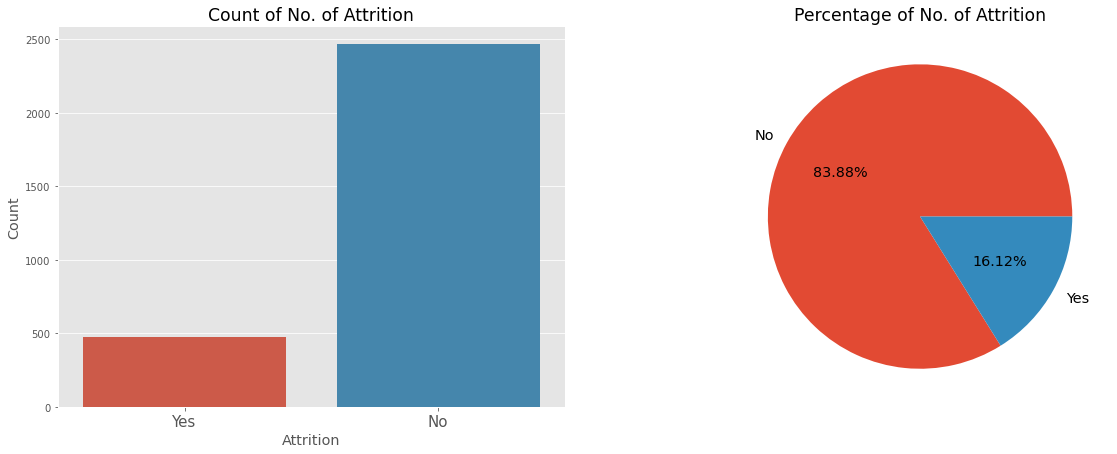

In [18]:
######## Plotting graphs of count of attrition #######

plt.subplots(1,2,figsize=(20,7))

plt.subplot(1,2,1)
sns.countplot(x=df['Attrition'])
#sns.countplot(x=df['Attrition'],palette=['#432371',"#FAAE7B"])
plt.title('Count of No. of Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'x-large'})
plt.xticks(fontsize=15)
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)
plt.pie(df['Attrition'].value_counts(),labels=df['Attrition'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'})
plt.title('Percentage of No. of Attrition',fontdict={'fontsize':'xx-large'})

# 16.12% or approximately 240 employee has left the job.

### Department Wise Attrition :

In [19]:
df['Department'].value_counts()

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64

In [20]:
df['Department'].value_counts(normalize=True)

Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64

Text(0.5, 1.0, '% of Employee in Each Department')

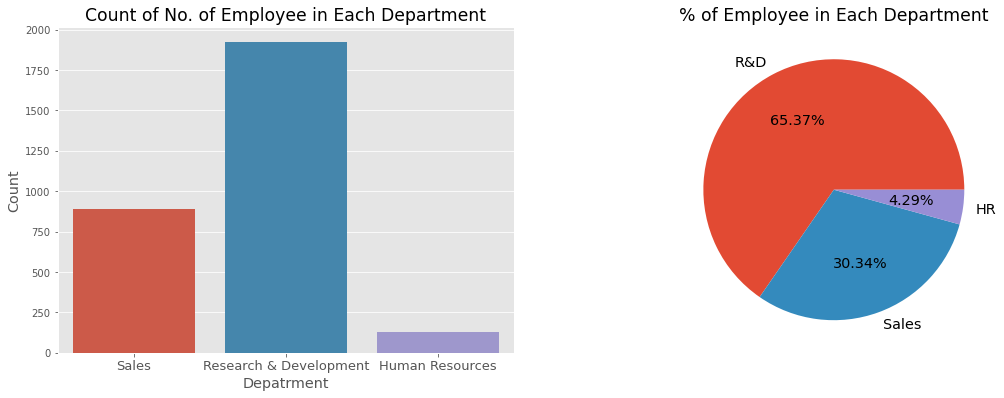

In [21]:
plt.subplots(1,2,figsize=(18,6))

plt.subplot(1,2,1)
sns.countplot(x=df['Department'])
plt.title('Count of No. of Employee in Each Department',fontdict={'fontsize':'xx-large'})
plt.xlabel('Depatrment',fontdict={'fontsize':'x-large'})
plt.xticks(fontsize=13)
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)
plt.pie(df['Department'].value_counts(),labels=['R&D','Sales','HR'],autopct='%0.2f%%',textprops={'fontsize':'x-large'})
plt.title('% of Employee in Each Department',fontdict={'fontsize':'xx-large'})

Text(0.5, 1.0, '% of Employee in Each Department')

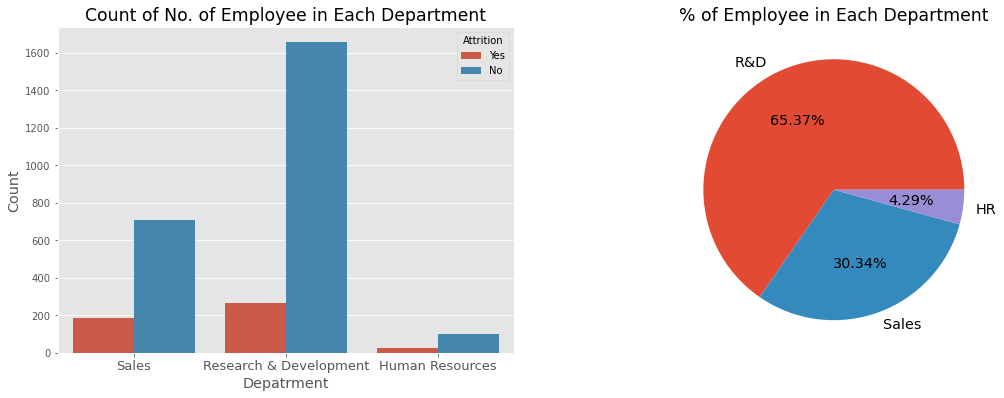

In [22]:
plt.subplots(1,2,figsize=(18,6))

plt.subplot(1,2,1)
sns.countplot(x=df['Department'],hue=df['Attrition'])
plt.title('Count of No. of Employee in Each Department',fontdict={'fontsize':'xx-large'})
plt.xlabel('Depatrment',fontdict={'fontsize':'x-large'})
plt.xticks(fontsize=13)
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)
plt.pie(df['Department'].value_counts(),labels=['R&D','Sales','HR'],autopct='%0.2f%%',textprops={'fontsize':'x-large'})
plt.title('% of Employee in Each Department',fontdict={'fontsize':'xx-large'})

observation:-  We can see most employees are there from R&D dept and for each department attrition is there 

Text(0.5, 1.0, '% of Attrition in HR Dept.')

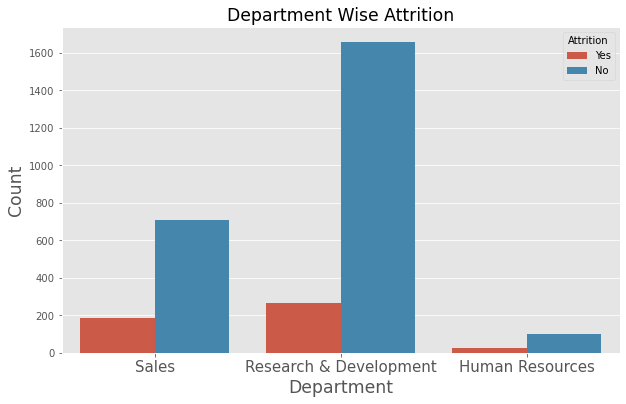

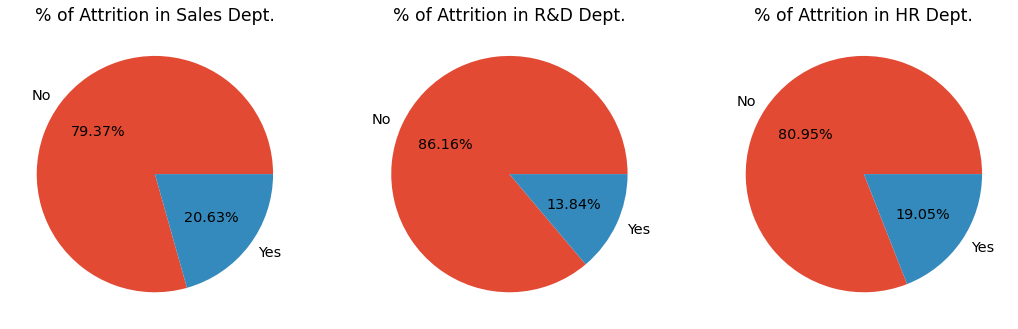

In [23]:


plt.figure(figsize=(10,6))
sns.countplot(x='Department',hue='Attrition',data=df)
plt.title('Department Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Department',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=15)

plt.subplots(1,3,figsize=(18,6))

plt.subplot(1,3,1)
Sales_dept=df[df['Department']=='Sales']
plt.pie(Sales_dept['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'})
plt.title('% of Attrition in Sales Dept.',fontdict={'fontsize':'xx-large'})

plt.subplot(1,3,2)
R_and_D_dept=df[df['Department']=='Research & Development']
plt.pie(R_and_D_dept['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'})
plt.title('% of Attrition in R&D Dept.',fontdict={'fontsize':'xx-large'})

plt.subplot(1,3,3)
HR_dept=df[df['Department']=='Human Resources']
plt.pie(HR_dept['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'})
plt.title('% of Attrition in HR Dept.',fontdict={'fontsize':'xx-large'})

Text(0.5, 1.0, 'Department Wise % of No Attrition')

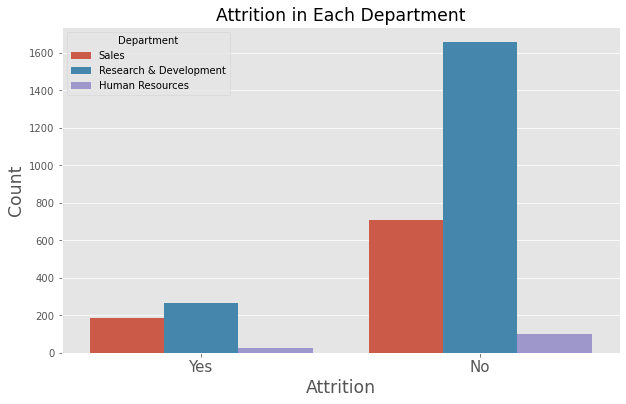

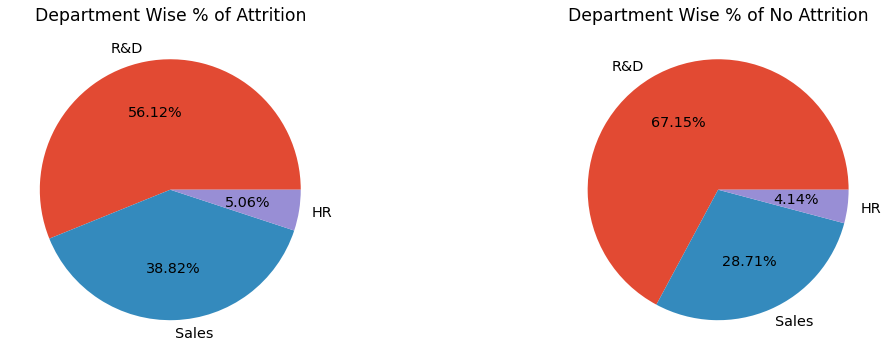

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='Attrition',hue='Department',data=df)
plt.title('Attrition in Each Department',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=15)

plt.subplots(1,2,figsize=(18,6))

plt.subplot(1,2,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['Department'].value_counts(),labels=['R&D','Sales','HR'],autopct='%0.2f%%',textprops={'fontsize':'x-large'})
plt.title('Department Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['Department'].value_counts(),labels=['R&D','Sales','HR'],autopct='%0.2f%%',textprops={'fontsize':'x-large'})
plt.title('Department Wise % of No Attrition',fontdict={'fontsize':'xx-large'})


## Observations
from the above analysis we can say that more attrition was in R & D department after that in Sales department and then in HR department

## Travel Frequency Wise Attrition :

Text(0.5, 1.0, 'Travel Frequency Wise % of No Attrition')

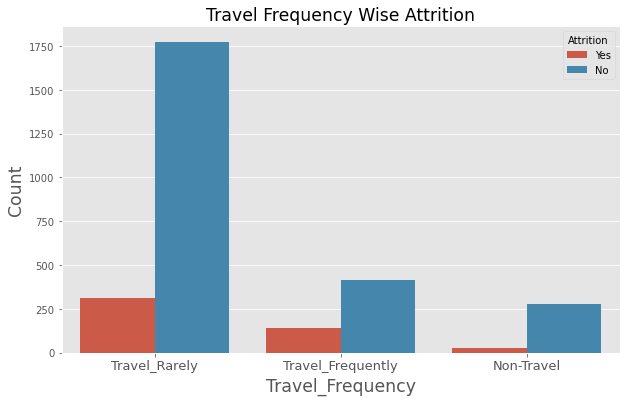

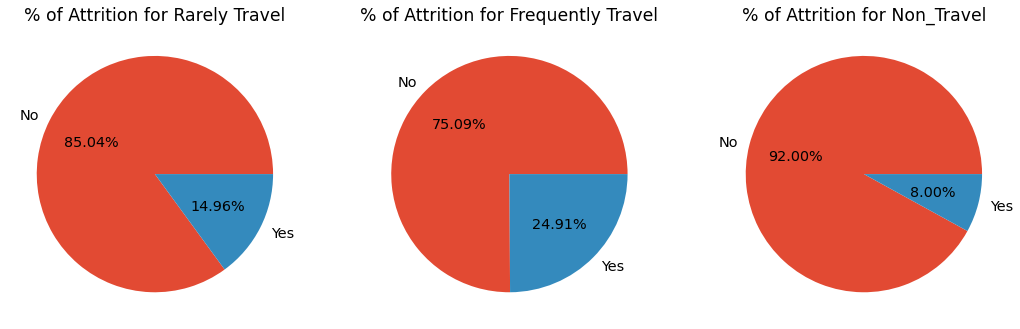

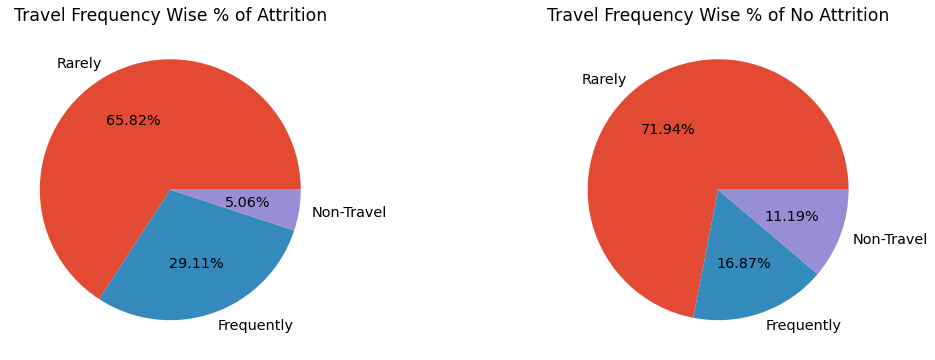

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)
plt.title('Travel Frequency Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Travel_Frequency',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)


plt.subplots(1,3,figsize=(18,6))

plt.subplot(1,3,1)
Rarely_Travel=df[df['BusinessTravel']=='Travel_Rarely']
plt.pie(Rarely_Travel['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',
        textprops={'fontsize':'x-large'})
plt.title('% of Attrition for Rarely Travel',fontdict={'fontsize':'xx-large'})

plt.subplot(1,3,2)
Frequently_Travel=df[df['BusinessTravel']=='Travel_Frequently']
plt.pie(Frequently_Travel['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',
        textprops={'fontsize':'x-large'})
plt.title('% of Attrition for Frequently Travel',fontdict={'fontsize':'xx-large'})

plt.subplot(1,3,3)
Non_Travel=df[df['BusinessTravel']=='Non-Travel']
plt.pie(Non_Travel['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',
        textprops={'fontsize':'x-large'})
plt.title('% of Attrition for Non_Travel',fontdict={'fontsize':'xx-large'})


plt.subplots(1,2,figsize=(18,6))

plt.subplot(1,2,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['BusinessTravel'].value_counts(),labels=['Rarely','Frequently','Non-Travel'],autopct='%0.2f%%',
        textprops={'fontsize':'x-large'})
plt.title('Travel Frequency Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['BusinessTravel'].value_counts(),labels=['Rarely','Frequently','Non-Travel'],autopct='%0.2f%%',
        textprops={'fontsize':'x-large'})
plt.title('Travel Frequency Wise % of No Attrition',fontdict={'fontsize':'xx-large'})


In [26]:
#Attrition_yes['BusinessTravel'].value_counts()

# observation

from the above graphs we can observe that  there is a direct relationship between travel and attrition

## Effect of Daily Rate on Attrition :

Text(0, 0.5, 'Count')

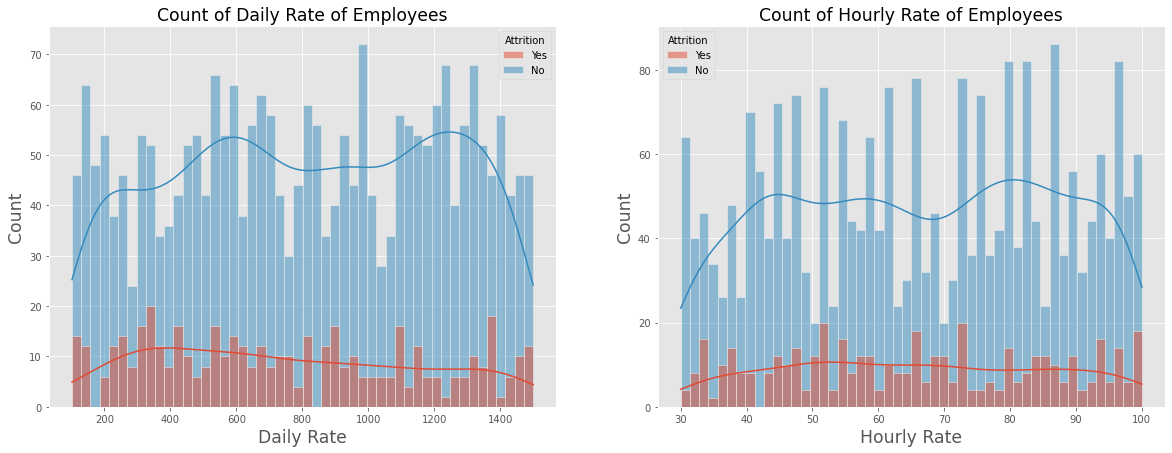

In [27]:
## for histogram continuous variable on x axis and on y axis how much time the value is coming i.e. the frequency density
### histogram gives distribution of the data

plt.subplots(1,2,figsize=(20,7))

plt.subplot(1,2,1)
sns.histplot(x='DailyRate',kde=True,bins=50,hue='Attrition',data=df)
plt.title('Count of Daily Rate of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Daily Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
sns.histplot(x='HourlyRate',kde=True,bins=50,hue='Attrition',data=df)
plt.title('Count of Hourly Rate of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Hourly Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

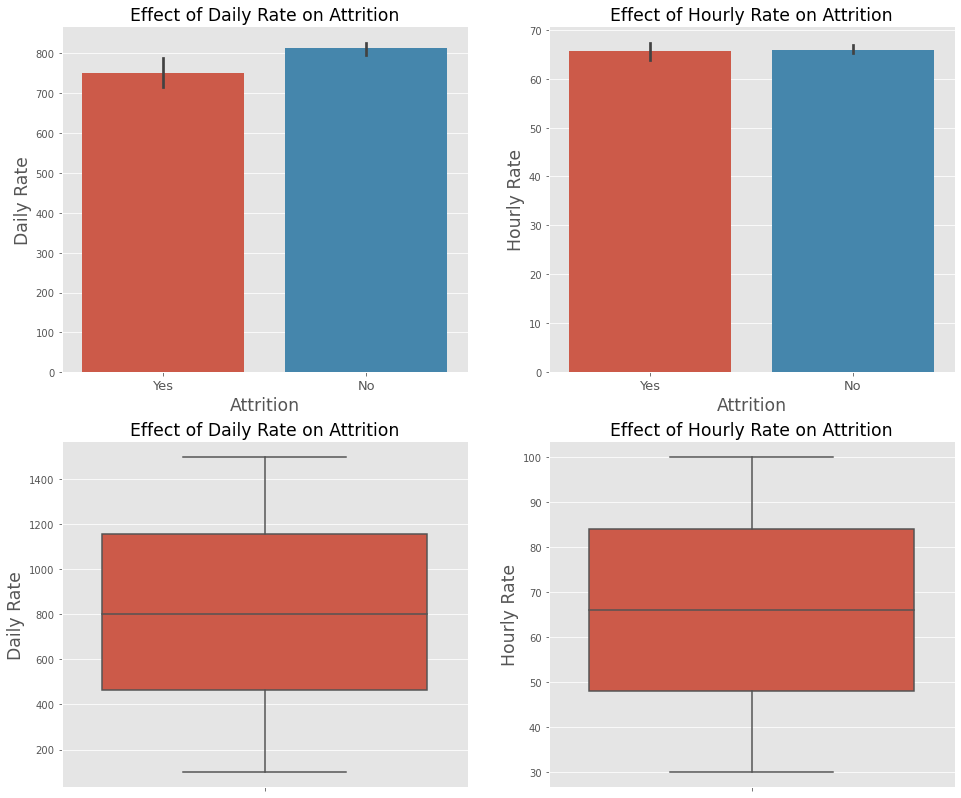

In [28]:

#To use barplot plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that
#it creates a plot taking a mean per categorical column.
plt.subplots(2,2,figsize=(16,14))

plt.subplot(2,2,1)
sns.barplot(x='Attrition',y='DailyRate',data=df)
plt.title('Effect of Daily Rate on Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Daily Rate',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)

plt.subplot(2,2,2)
sns.barplot(x='Attrition',y='HourlyRate',data=df)
plt.title('Effect of Hourly Rate on Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Hourly Rate',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)

plt.subplot(2,2,3)
sns.boxplot(y='DailyRate',data=df)
plt.title('Effect of Daily Rate on Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Daily Rate',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
sns.boxplot(y='HourlyRate',data=df)
plt.title('Effect of Hourly Rate on Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Hourly Rate',fontdict={'fontsize':'xx-large'})

plt.show()

# Observation :
the hourly rate daily rate has nearly no impact on attrition.

## Effect of Distance From Home on Attrition :

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

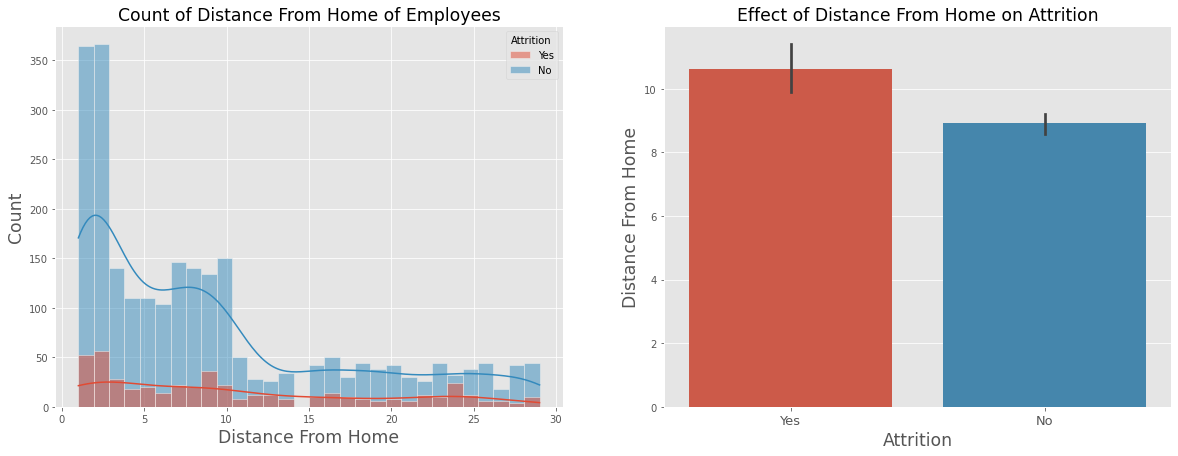

In [29]:
plt.subplots(1,2,figsize=(20,7))

plt.subplot(1,2,1)
sns.histplot(x='DistanceFromHome',data=df,kde=True,bins=30,hue='Attrition')
plt.title('Count of Distance From Home of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Distance From Home',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
sns.barplot(x='Attrition',y='DistanceFromHome',data=df)
plt.title('Effect of Distance From Home on Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Distance From Home',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)

In [30]:
## Three main types of plots in sns  relplot (for numeric columns), catplot(for categorical column), distplot( distribution)

# Observation  
Employee live average 10.5 km away from office leave the job.

## Effect of Education and Education Field :

In [31]:
df['Education'].value_counts()

3    1144
4     796
2     564
1     340
5      96
Name: Education, dtype: int64

In [32]:
df['EducationField'].value_counts()

Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64

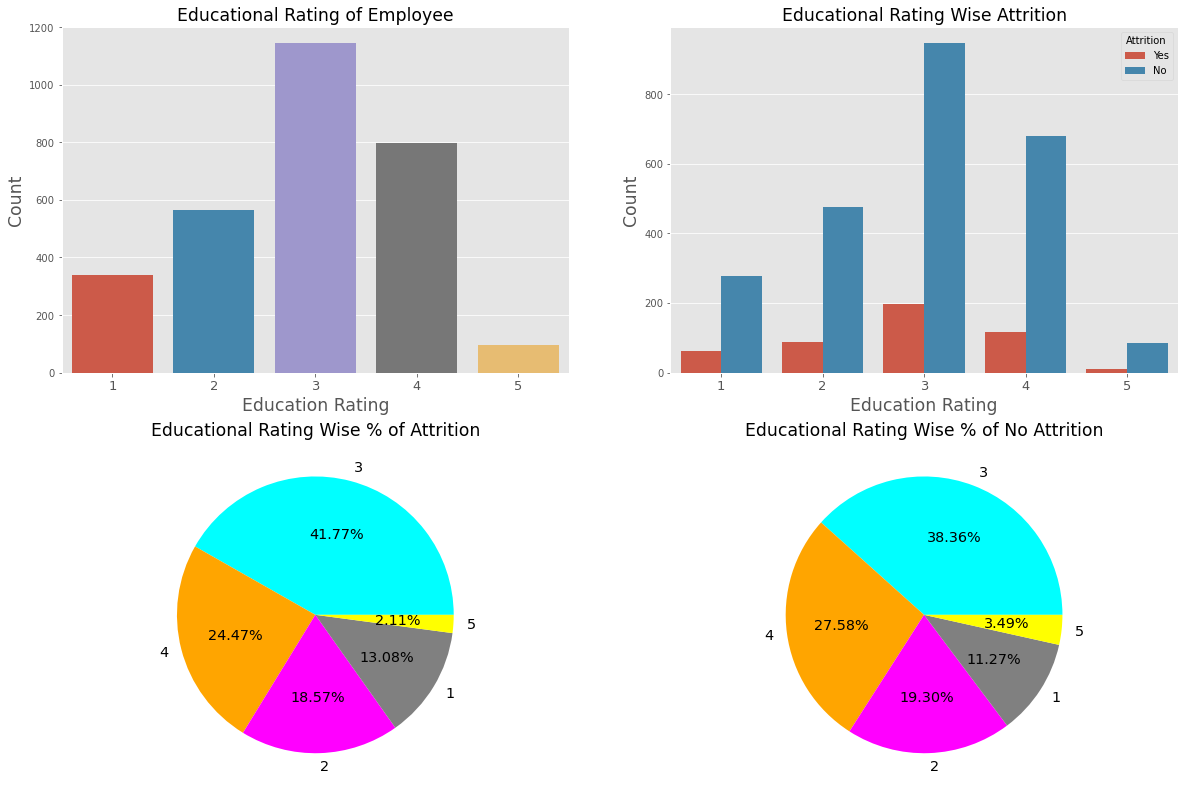

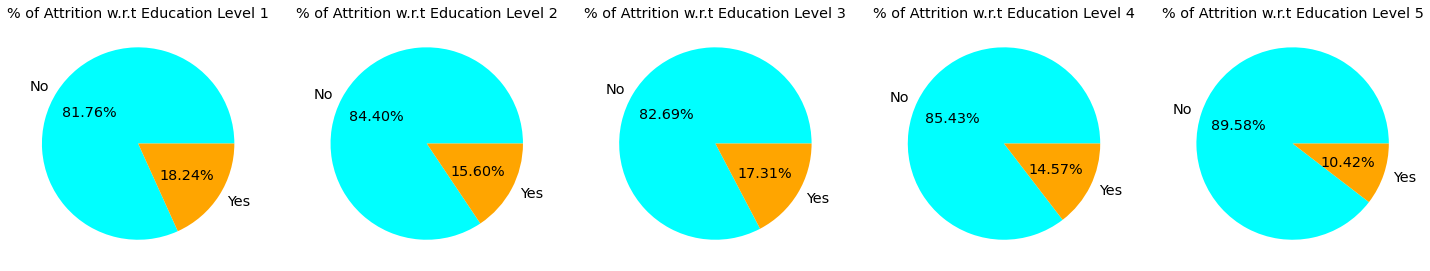

In [33]:
plt.subplots(2,2,figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(x='Education',data=df)
plt.title('Educational Rating of Employee',fontdict={'fontsize':'xx-large'})
plt.xlabel('Education Rating',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)

plt.subplot(2,2,2)
sns.countplot(x='Education',data=df,hue='Attrition')
plt.title('Educational Rating Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Education Rating',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['Education'].value_counts(),labels=Attrition_yes['Education'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','grey','yellow'])
plt.title('Educational Rating Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['Education'].value_counts(),labels=Attrition_no['Education'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','grey','yellow'])
plt.title('Educational Rating Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,5,figsize=(25,10))

plt.subplot(1,5,1)
plt.pie(df[df['Education']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Education Level 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,2)
plt.pie(df[df['Education']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Education Level 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,3)
plt.pie(df[df['Education']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Education Level 3',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,4)
plt.pie(df[df['Education']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Education Level 4',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,5)
plt.pie(df[df['Education']==5]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Education Level 5',fontdict={'fontsize':'x-large'})

plt.show()

In [34]:
#Attrition_yes['Education'].value_counts()

# observations
most of the Employees having  education Level 1 left   the job

## Effect of Educational Field :

Text(0.5, 1.0, 'Educational Field Wise % of No Attrition')

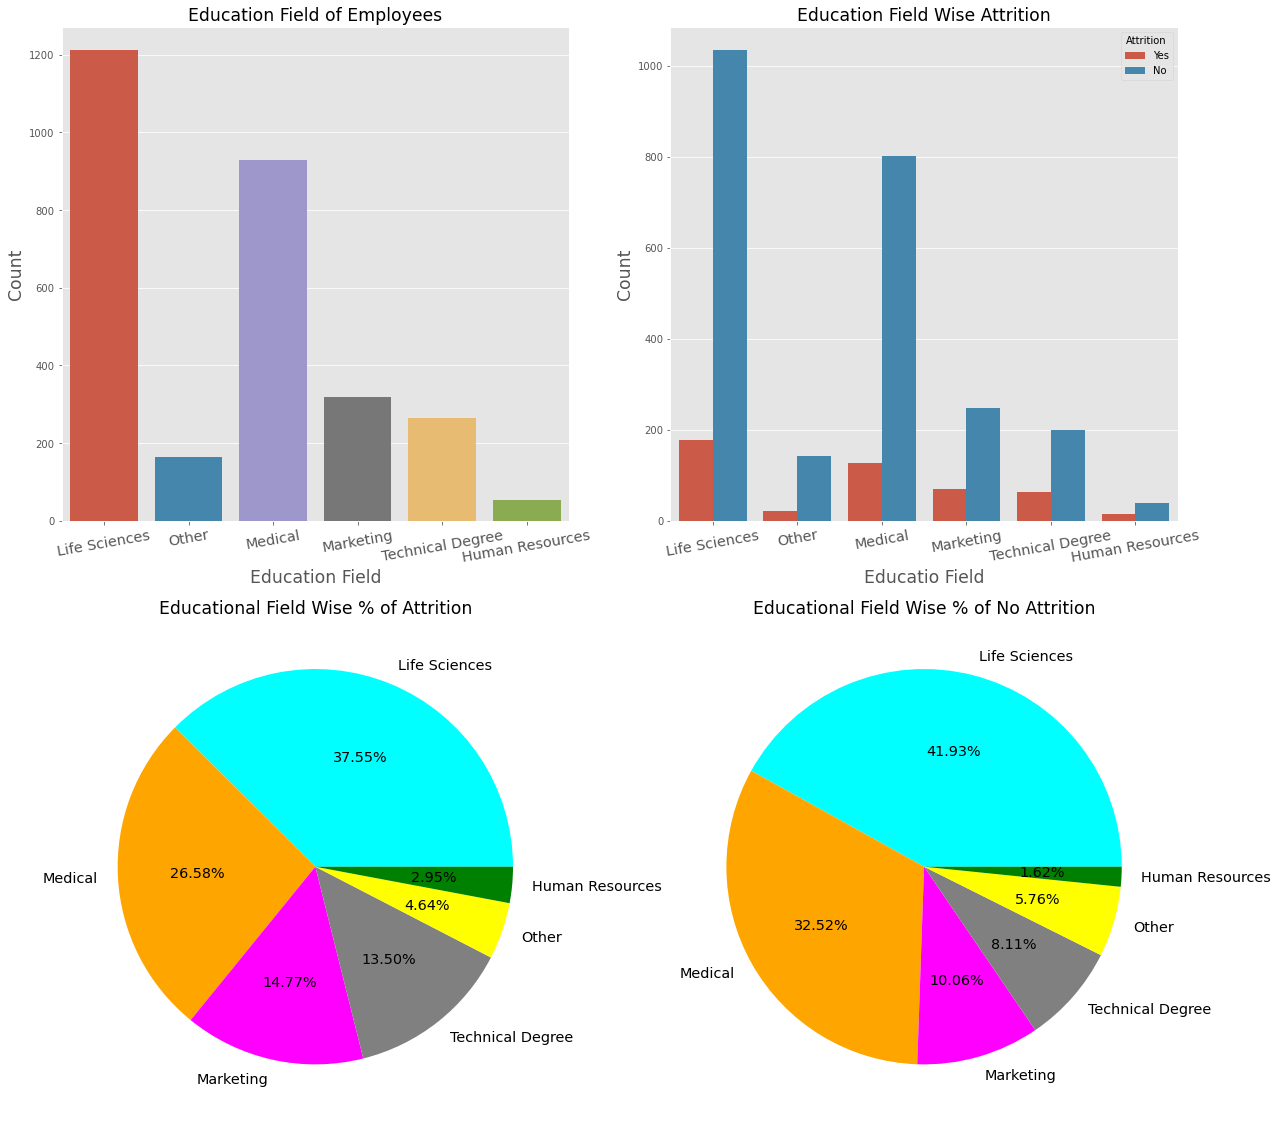

In [35]:
plt.subplots(2,2,figsize=(20,20))

plt.subplot(2,2,1)
sns.countplot(x='EducationField',data=df)
plt.title('Education Field of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Education Field',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(rotation=10,fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='EducationField',data=df,hue='Attrition')
plt.title('Education Field Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Educatio Field',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(rotation=10,fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['EducationField'].value_counts(),labels=Attrition_yes['EducationField'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','grey','yellow','green'])
plt.title('Educational Field Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['EducationField'].value_counts(),labels=Attrition_no['EducationField'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','grey','yellow','green'])
plt.title('Educational Field Wise % of No Attrition',fontdict={'fontsize':'xx-large'})


# observation
Most of the employees from life acience doman have left the job

## Effect of Environment Satisfaction :

In [36]:
df['EnvironmentSatisfaction'].value_counts()

3    906
4    892
2    574
1    568
Name: EnvironmentSatisfaction, dtype: int64

In [37]:
df['EnvironmentSatisfaction'].value_counts()

3    906
4    892
2    574
1    568
Name: EnvironmentSatisfaction, dtype: int64

In [38]:
df.groupby('Attrition')['EnvironmentSatisfaction'].value_counts(normalize=True)

Attrition  EnvironmentSatisfaction
No         3                          0.317113
           4                          0.313058
           2                          0.197891
           1                          0.171938
Yes        1                          0.303797
           3                          0.261603
           4                          0.253165
           2                          0.181435
Name: EnvironmentSatisfaction, dtype: float64

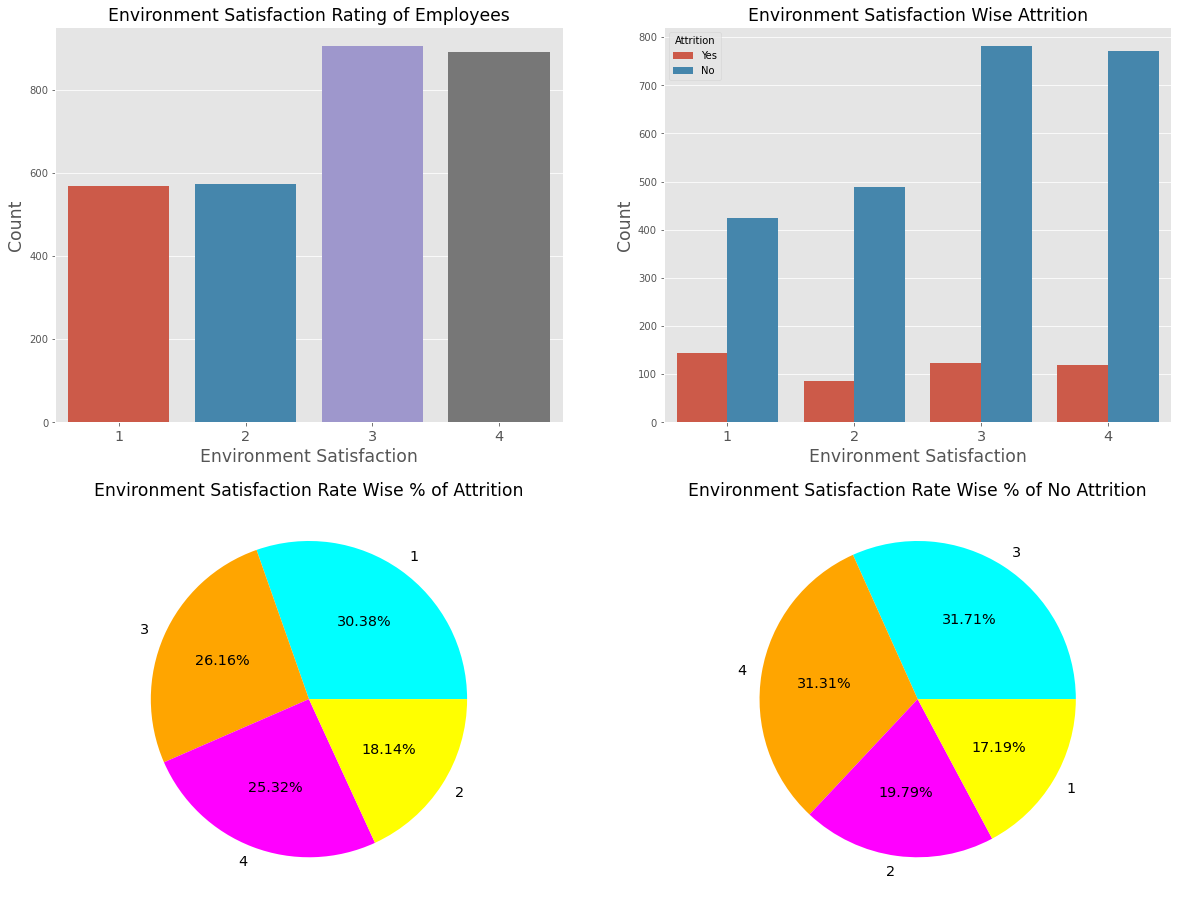

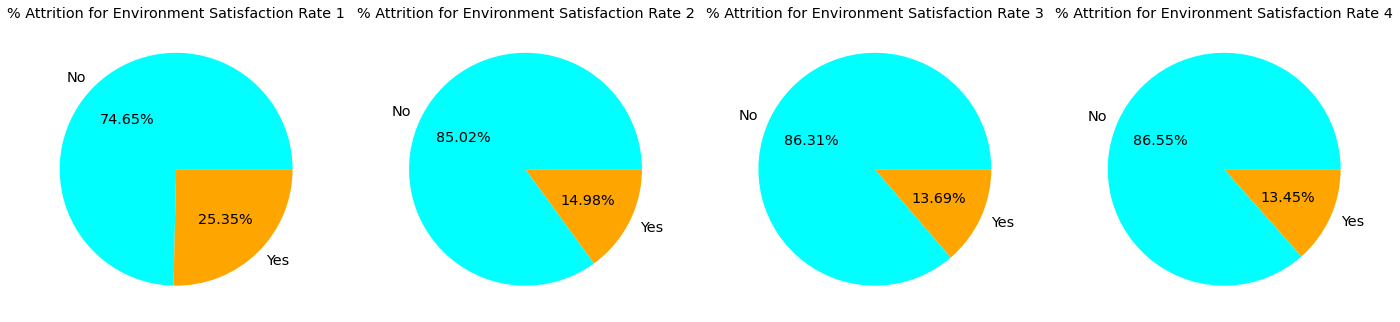

In [39]:
plt.subplots(2,2,figsize=(20,16))

plt.subplot(2,2,1)
sns.countplot(x='EnvironmentSatisfaction',data=df)
plt.title('Environment Satisfaction Rating of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Environment Satisfaction',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='EnvironmentSatisfaction',data=df,hue='Attrition')
plt.title('Environment Satisfaction Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Environment Satisfaction',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['EnvironmentSatisfaction'].value_counts(),labels=Attrition_yes['EnvironmentSatisfaction'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('Environment Satisfaction Rate Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['EnvironmentSatisfaction'].value_counts(),labels=Attrition_no['EnvironmentSatisfaction'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('Environment Satisfaction Rate Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,4,figsize=(24,10))

plt.subplot(1,4,1)
plt.pie(df[df['EnvironmentSatisfaction']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Environment Satisfaction Rate 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,2)
plt.pie(df[df['EnvironmentSatisfaction']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Environment Satisfaction Rate 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,3)
plt.pie(df[df['EnvironmentSatisfaction']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Environment Satisfaction Rate 3',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,4)
plt.pie(df[df['EnvironmentSatisfaction']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Environment Satisfaction Rate 4',fontdict={'fontsize':'x-large'})

plt.show()

# Observation :
Most of the employees with EnvironmentSatisfaction Rate=1 have left the job

## Effect of Relationship Satisfaction :

In [40]:
df['RelationshipSatisfaction'].value_counts()

3    918
4    864
2    606
1    552
Name: RelationshipSatisfaction, dtype: int64

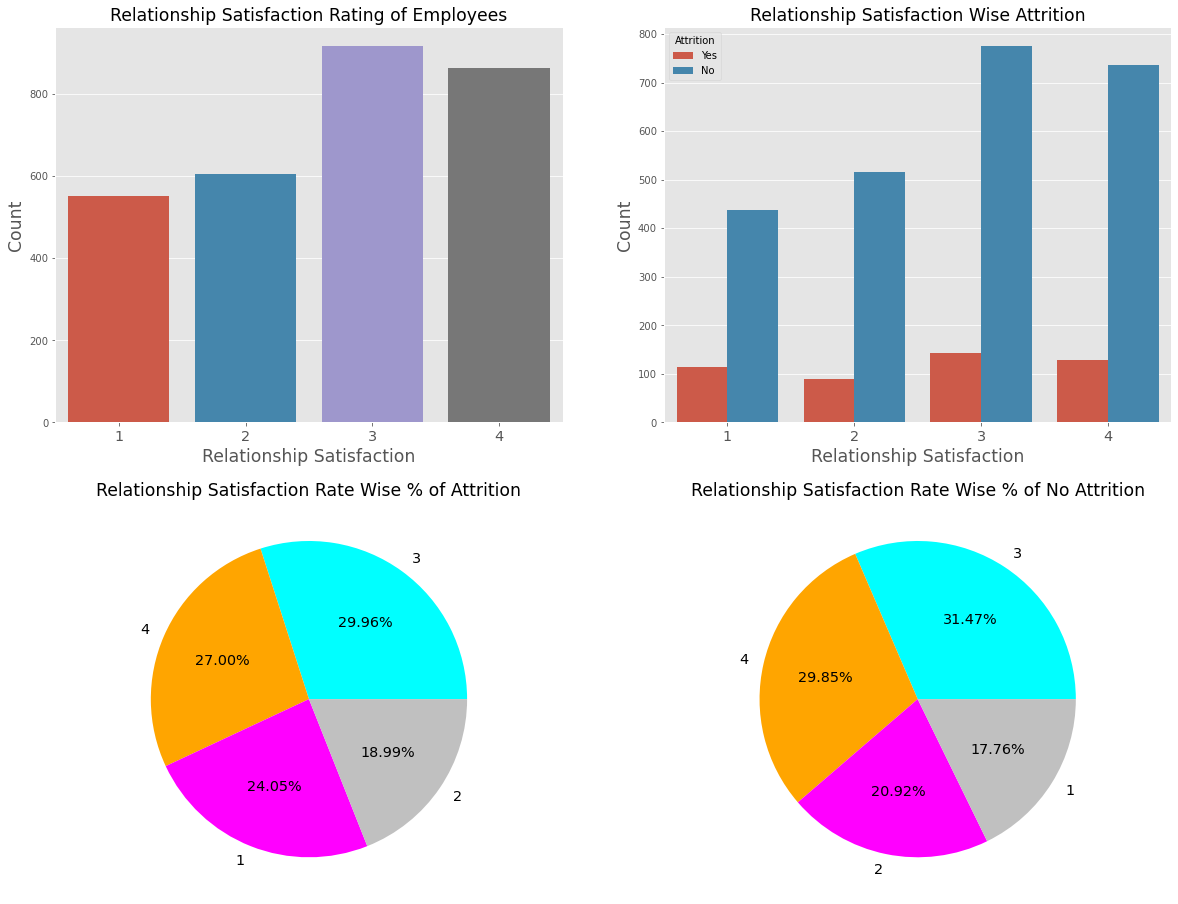

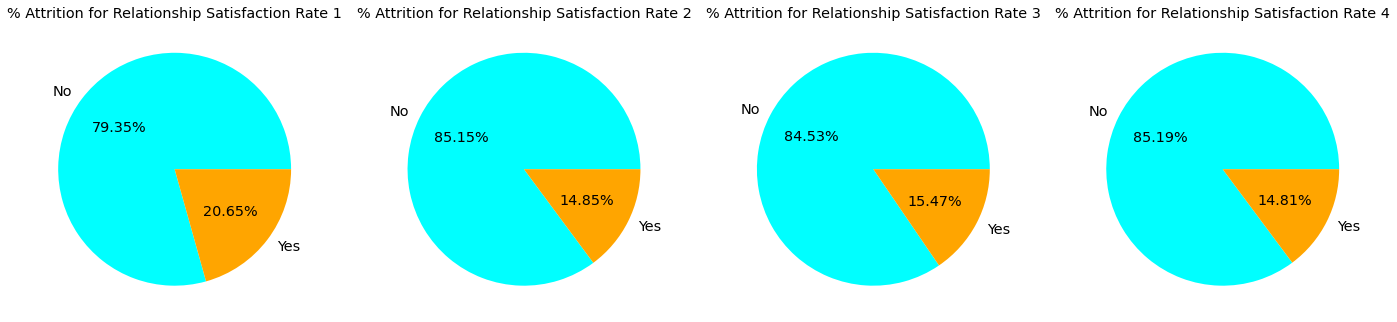

In [41]:
plt.subplots(2,2,figsize=(20,16))

plt.subplot(2,2,1)
sns.countplot(x='RelationshipSatisfaction',data=df)
plt.title('Relationship Satisfaction Rating of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Relationship Satisfaction',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='RelationshipSatisfaction',data=df,hue='Attrition')
plt.title('Relationship Satisfaction Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Relationship Satisfaction',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['RelationshipSatisfaction'].value_counts(),labels=Attrition_yes['RelationshipSatisfaction'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','silver'])
plt.title('Relationship Satisfaction Rate Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['RelationshipSatisfaction'].value_counts(),labels=Attrition_no['RelationshipSatisfaction'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','silver'])
plt.title('Relationship Satisfaction Rate Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,4,figsize=(24,10))

plt.subplot(1,4,1)
plt.pie(df[df['RelationshipSatisfaction']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Relationship Satisfaction Rate 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,2)
plt.pie(df[df['RelationshipSatisfaction']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Relationship Satisfaction Rate 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,3)
plt.pie(df[df['RelationshipSatisfaction']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Relationship Satisfaction Rate 3',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,4)
plt.pie(df[df['RelationshipSatisfaction']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Relationship Satisfaction Rate 4',fontdict={'fontsize':'x-large'})

plt.show()

# observation:-
most of the employees  with Relationship Satidfaction Rate=1 have left the jobs

## Effect of Job Involvement :

In [42]:
df['JobInvolvement'].value_counts()

3    1736
2     750
4     288
1     166
Name: JobInvolvement, dtype: int64

In [43]:
df.groupby('Attrition')['JobInvolvement'].value_counts()

Attrition  JobInvolvement
No         3                 1486
           2                  608
           4                  262
           1                  110
Yes        3                  250
           2                  142
           1                   56
           4                   26
Name: JobInvolvement, dtype: int64

Text(0.5, 1.0, '% of Attrition w.r.t Job Involvement Rate 4')

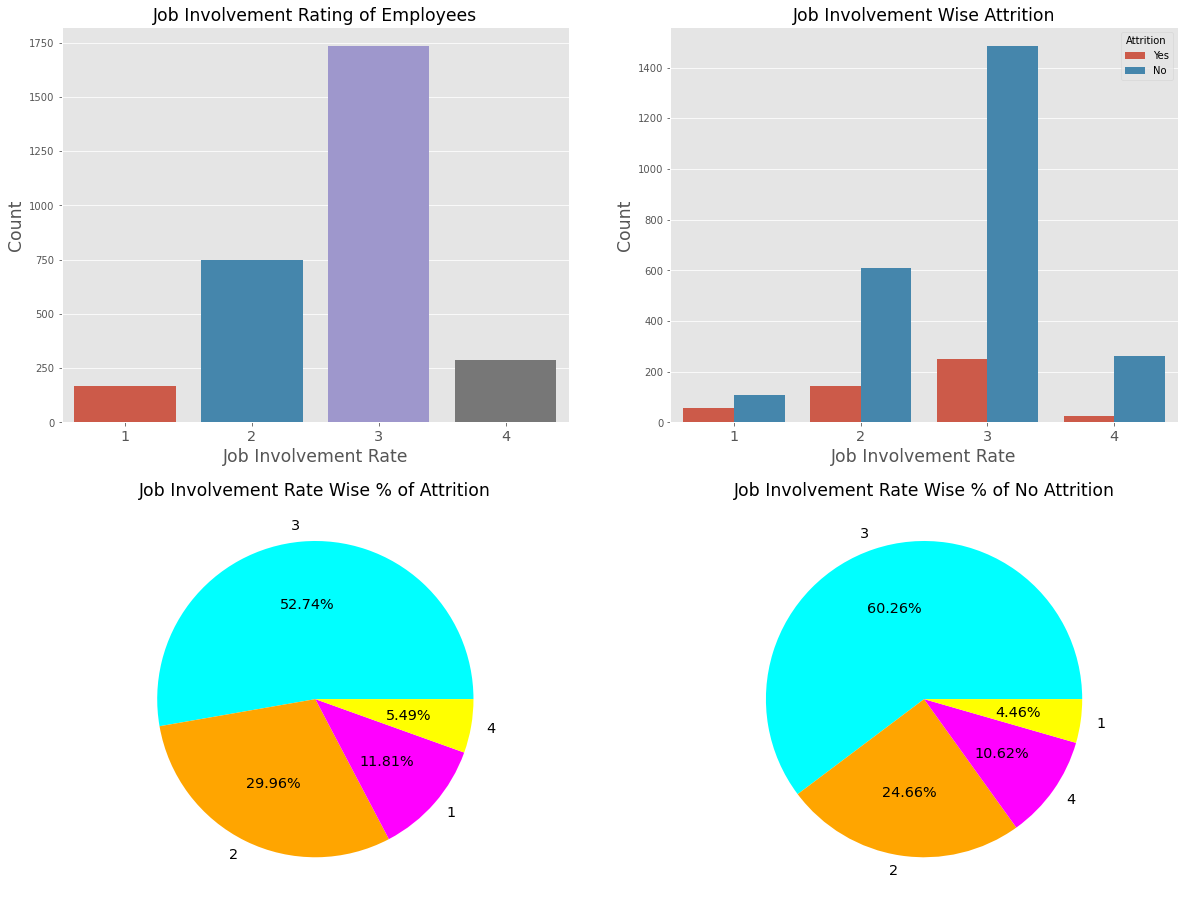

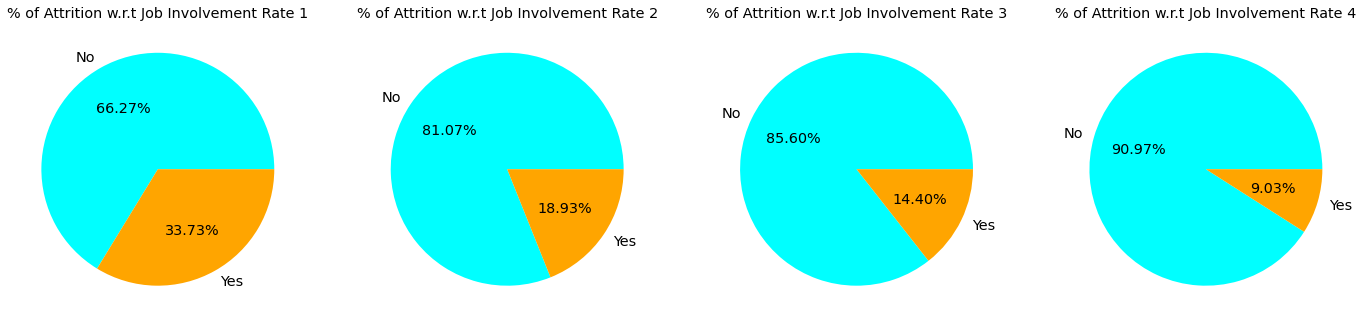

In [44]:
plt.subplots(2,2,figsize=(20,16))

plt.subplot(2,2,1)
sns.countplot(x='JobInvolvement',data=df)
plt.title('Job Involvement Rating of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Job Involvement Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='JobInvolvement',data=df,hue='Attrition')
plt.title('Job Involvement Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Job Involvement Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['JobInvolvement'].value_counts(),labels=Attrition_yes['JobInvolvement'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('Job Involvement Rate Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['JobInvolvement'].value_counts(),labels=Attrition_no['JobInvolvement'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('Job Involvement Rate Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,4,figsize=(24,10))

plt.subplot(1,4,1)
plt.pie(df[df['JobInvolvement']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Involvement Rate 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,2)
plt.pie(df[df['JobInvolvement']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Involvement Rate 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,3)
plt.pie(df[df['JobInvolvement']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Involvement Rate 3',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,4)
plt.pie(df[df['JobInvolvement']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Involvement Rate 4',fontdict={'fontsize':'x-large'})


# observation
Most of the employees with JobInvolvement Rate=1 have left the job

## Effect of Job Role :

In [45]:
df['JobRole'].value_counts()

Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64

In [46]:
df['JobRole'].value_counts(normalize=True)*100

Sales Executive              22.176871
Research Scientist           19.863946
Laboratory Technician        17.619048
Manufacturing Director        9.863946
Healthcare Representative     8.911565
Manager                       6.938776
Sales Representative          5.646259
Research Director             5.442177
Human Resources               3.537415
Name: JobRole, dtype: float64

In [47]:
df.groupby('JobRole')['Attrition'].value_counts(normalize=True)*100

JobRole                    Attrition
Healthcare Representative  No           93.129771
                           Yes           6.870229
Human Resources            No           76.923077
                           Yes          23.076923
Laboratory Technician      No           76.061776
                           Yes          23.938224
Manager                    No           95.098039
                           Yes           4.901961
Manufacturing Director     No           93.103448
                           Yes           6.896552
Research Director          No           97.500000
                           Yes           2.500000
Research Scientist         No           83.904110
                           Yes          16.095890
Sales Executive            No           82.515337
                           Yes          17.484663
Sales Representative       No           60.240964
                           Yes          39.759036
Name: Attrition, dtype: float64

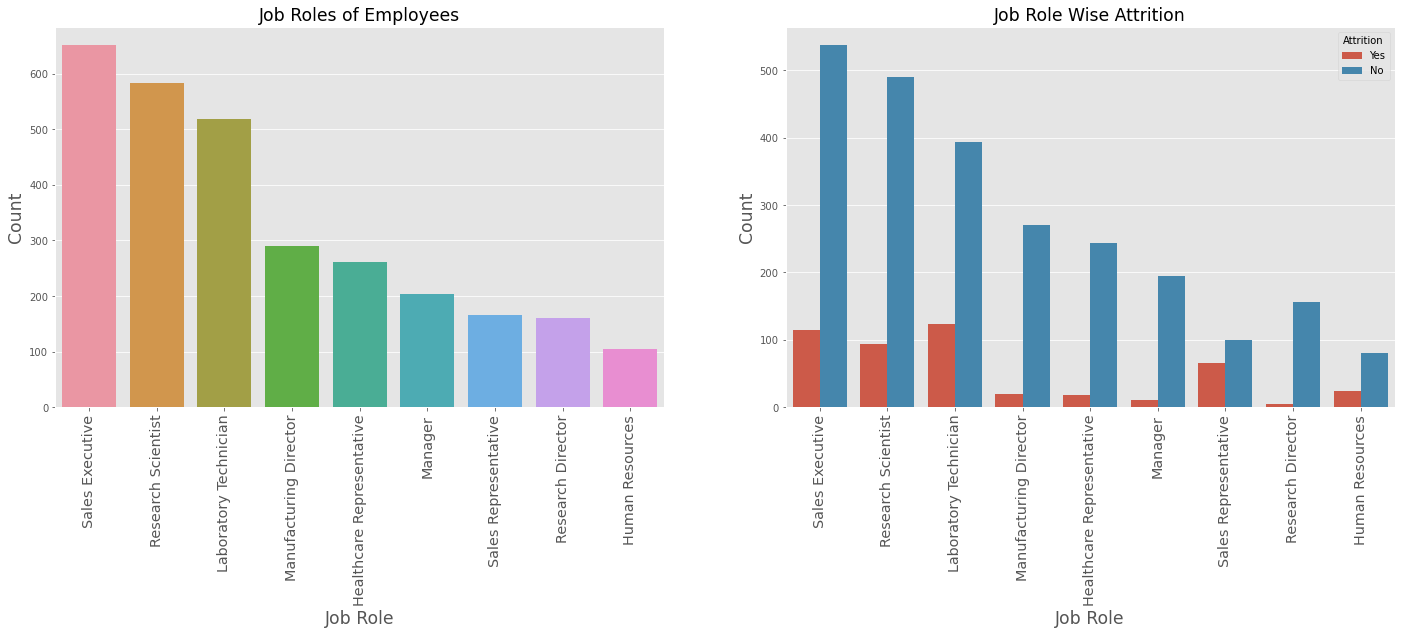

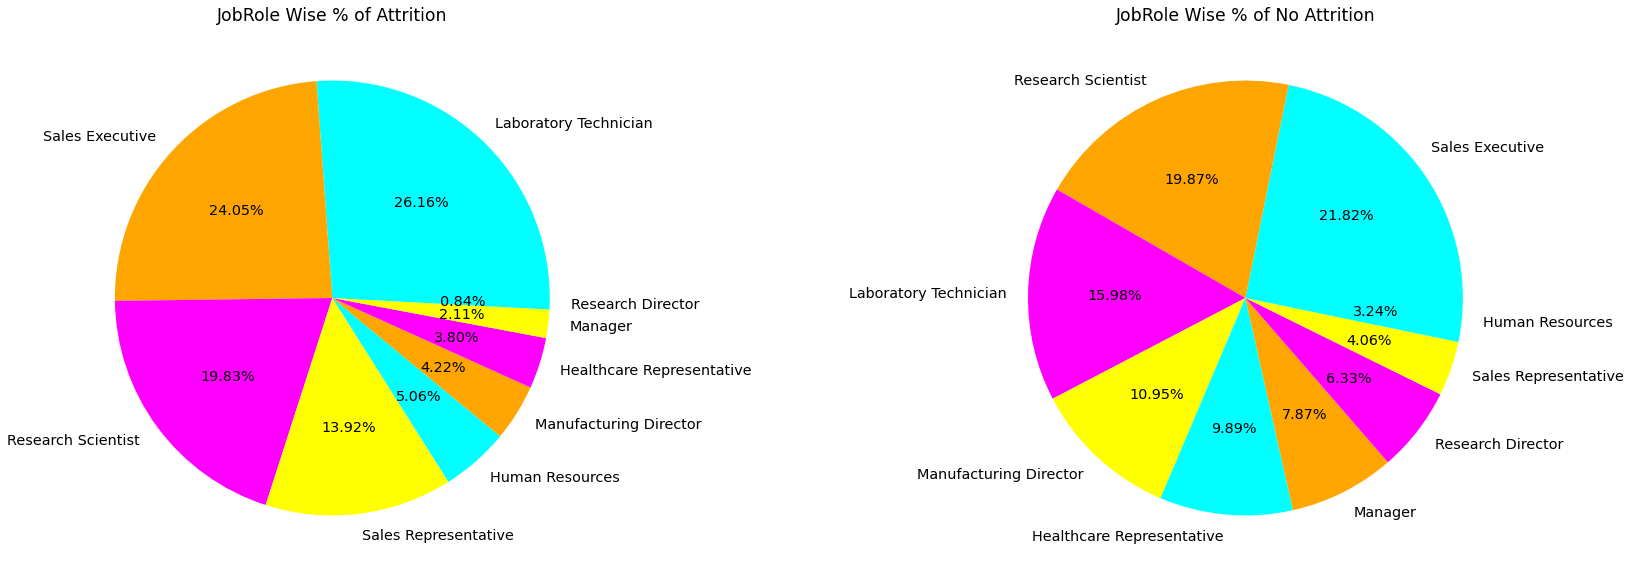

In [48]:
plt.subplots(1,2,figsize=(24,7))

plt.subplot(1,2,1)
sns.countplot(x='JobRole',data=df)
plt.title('Job Roles of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Job Role',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(rotation=90,fontsize='x-large')

plt.subplot(1,2,2)
sns.countplot(x='JobRole',data=df,hue='Attrition')
plt.title('Job Role Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Job Role',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(rotation=90,fontsize='x-large')

plt.subplots(1,2,figsize=(30,10))
plt.subplot(1,2,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['JobRole'].value_counts(),labels=Attrition_yes['JobRole'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('JobRole Wise % of Attrition',fontdict={'fontsize':'xx-large'})
plt.subplot(1,2,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['JobRole'].value_counts(),labels=Attrition_no['JobRole'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('JobRole Wise % of No Attrition',fontdict={'fontsize':'xx-large'})
plt.show()

# Oservation 
most of the employees having JobRole as Laboratory Technician left the job

## Effect of Job Satisfaction :

In [49]:
df['JobSatisfaction'].value_counts()

4    918
3    884
1    578
2    560
Name: JobSatisfaction, dtype: int64

In [50]:
df['JobSatisfaction'].value_counts(normalize=True)*100

4    31.224490
3    30.068027
1    19.659864
2    19.047619
Name: JobSatisfaction, dtype: float64

Text(0.5, 1.0, '% of Attrition w.r.t Job Satisfaction Rate 4')

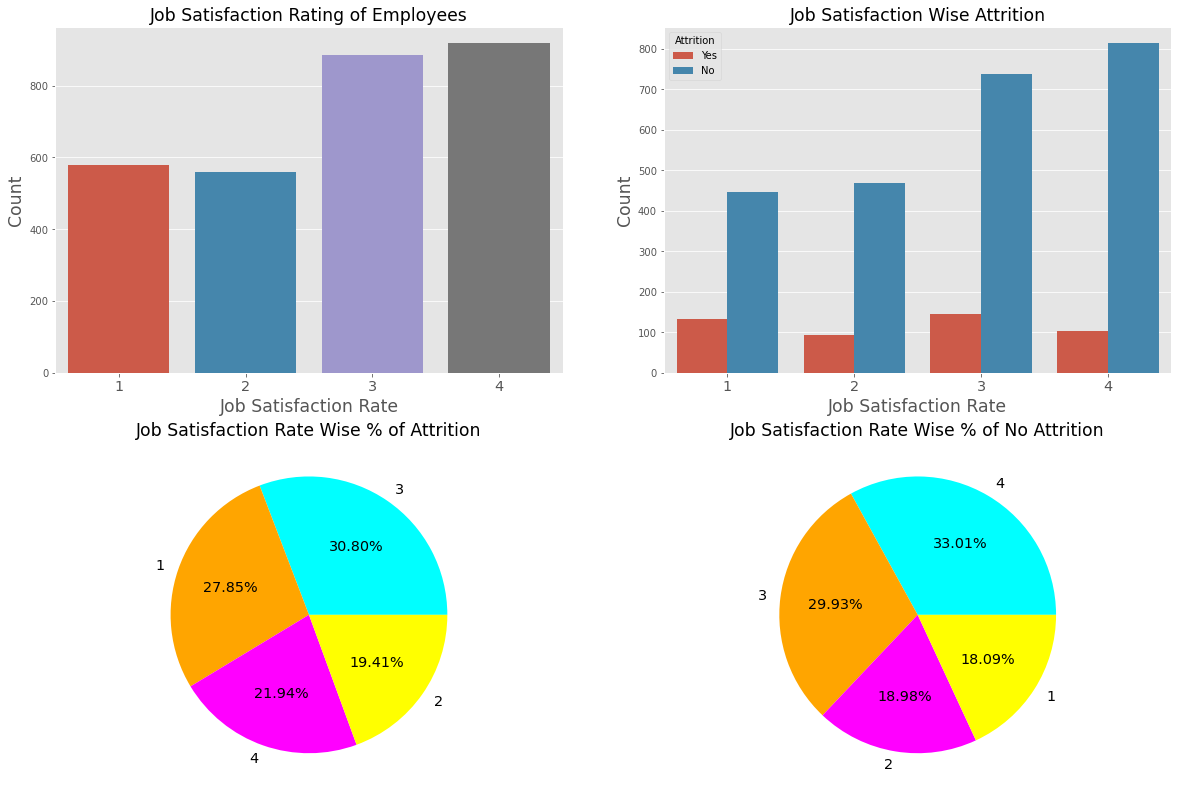

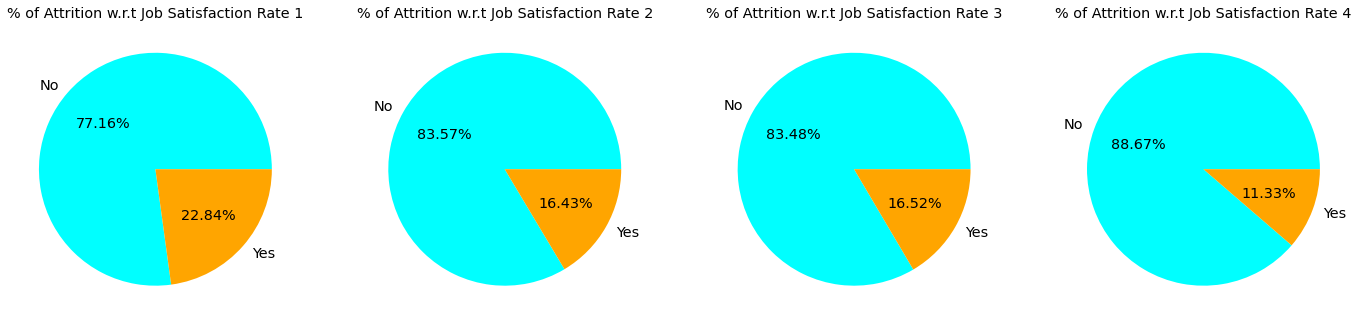

In [51]:
plt.subplots(2,2,figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(x='JobSatisfaction',data=df)
plt.title('Job Satisfaction Rating of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Job Satisfaction Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='JobSatisfaction',data=df,hue='Attrition')
plt.title('Job Satisfaction Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Job Satisfaction Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['JobSatisfaction'].value_counts(),labels=Attrition_yes['JobSatisfaction'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('Job Satisfaction Rate Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['JobSatisfaction'].value_counts(),labels=Attrition_no['JobSatisfaction'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('Job Satisfaction Rate Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,4,figsize=(24,10))

plt.subplot(1,4,1)
plt.pie(df[df['JobSatisfaction']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Satisfaction Rate 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,2)
plt.pie(df[df['JobSatisfaction']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Satisfaction Rate 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,3)
plt.pie(df[df['JobSatisfaction']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Satisfaction Rate 3',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,4)
plt.pie(df[df['JobSatisfaction']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Satisfaction Rate 4',fontdict={'fontsize':'x-large'})


# Observation 
most of the employees with Job satisfaction Rate=1 left the job

## Effect of Job Level :

In [52]:
df['JobLevel'].value_counts()

1    1086
2    1068
3     436
4     212
5     138
Name: JobLevel, dtype: int64

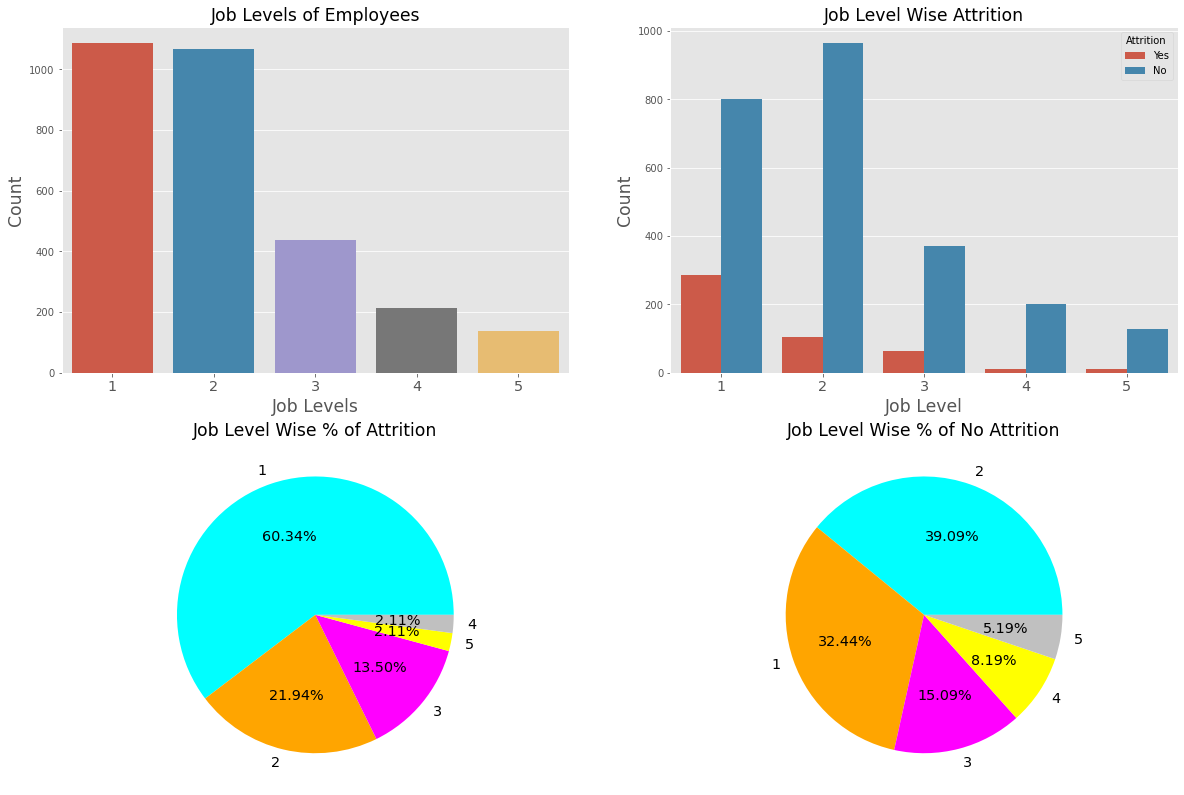

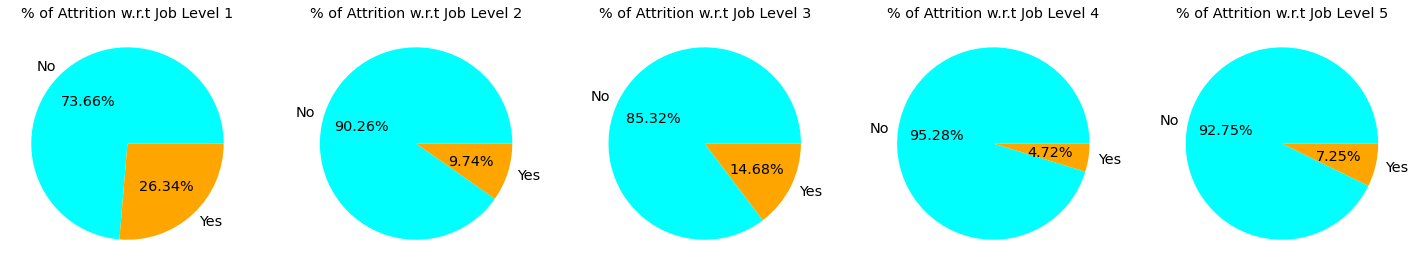

In [53]:
plt.subplots(2,2,figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(x='JobLevel',data=df)
plt.title('Job Levels of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Job Levels',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='JobLevel',data=df,hue='Attrition')
plt.title('Job Level Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Job Level',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['JobLevel'].value_counts(),labels=Attrition_yes['JobLevel'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','silver'])
plt.title('Job Level Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['JobLevel'].value_counts(),labels=Attrition_no['JobLevel'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','silver'])
plt.title('Job Level Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,5,figsize=(25,10))

plt.subplot(1,5,1)
plt.pie(df[df['JobLevel']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Level 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,2)
plt.pie(df[df['JobLevel']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Level 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,3)
plt.pie(df[df['JobLevel']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Level 3',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,4)
plt.pie(df[df['JobLevel']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Level 4',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,5)
plt.pie(df[df['JobLevel']==5]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Level 5',fontdict={'fontsize':'x-large'})

plt.show()

# Observation
Most of the employees which are at job level 1 have left the job

## Effect of Work Life Balance :

In [54]:
df['WorkLifeBalance'].value_counts()

3    1786
2     688
4     306
1     160
Name: WorkLifeBalance, dtype: int64

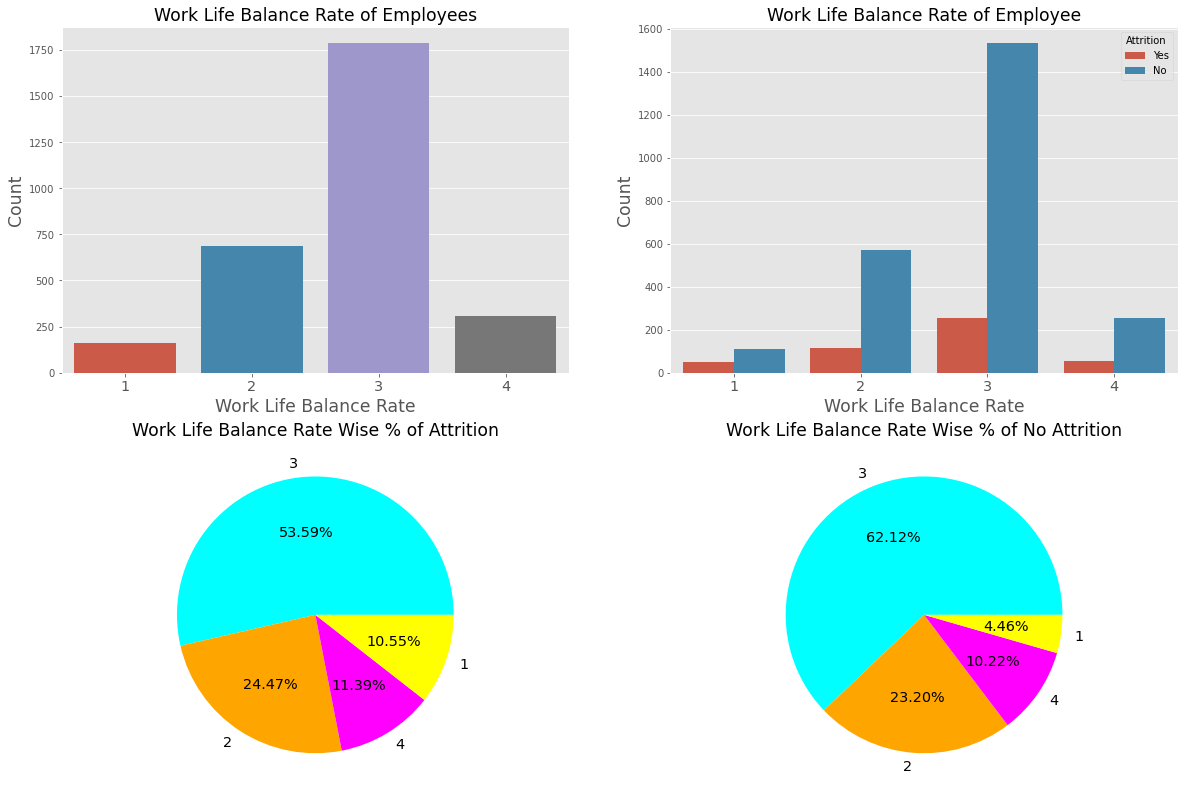

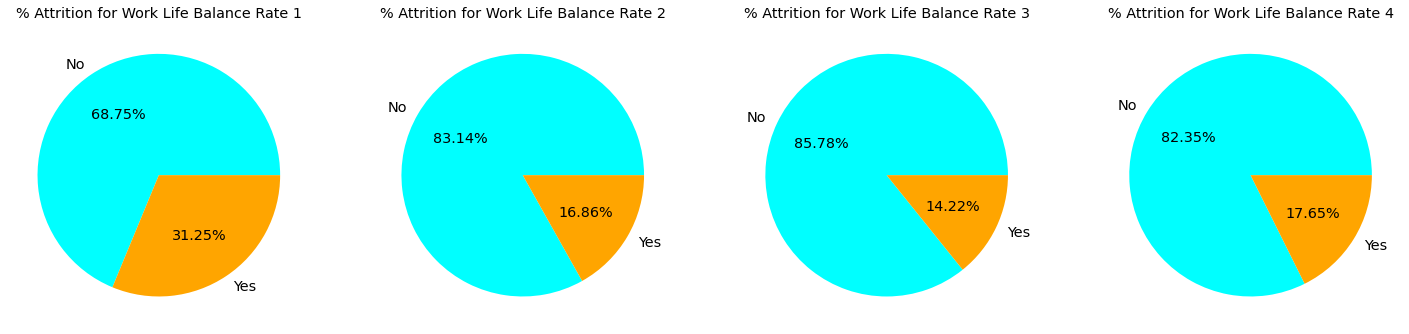

In [55]:
plt.subplots(2,2,figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(x='WorkLifeBalance',data=df)
plt.title('Work Life Balance Rate of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Work Life Balance Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='WorkLifeBalance',data=df,hue='Attrition')
plt.title('Work Life Balance Rate of Employee',fontdict={'fontsize':'xx-large'})
plt.xlabel('Work Life Balance Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['WorkLifeBalance'].value_counts(),labels=Attrition_yes['WorkLifeBalance'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','silver'])
plt.title('Work Life Balance Rate Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['WorkLifeBalance'].value_counts(),labels=Attrition_no['WorkLifeBalance'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','silver'])
plt.title('Work Life Balance Rate Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,4,figsize=(25,10))

plt.subplot(1,4,1)
plt.pie(df[df['WorkLifeBalance']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Work Life Balance Rate 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,2)
plt.pie(df[df['WorkLifeBalance']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Work Life Balance Rate 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,3)
plt.pie(df[df['WorkLifeBalance']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Work Life Balance Rate 3',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,4)
plt.pie(df[df['WorkLifeBalance']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Work Life Balance Rate 4',fontdict={'fontsize':'x-large'})

plt.show()

# Observation 
Most of the emloyees with Work Life balence Rate =1 have left the job

## Training Times Last Year :

In [56]:
df['TrainingTimesLastYear'].value_counts(normalize=True)*100

2    37.210884
3    33.401361
4     8.367347
5     8.095238
1     4.829932
6     4.421769
0     3.673469
Name: TrainingTimesLastYear, dtype: float64

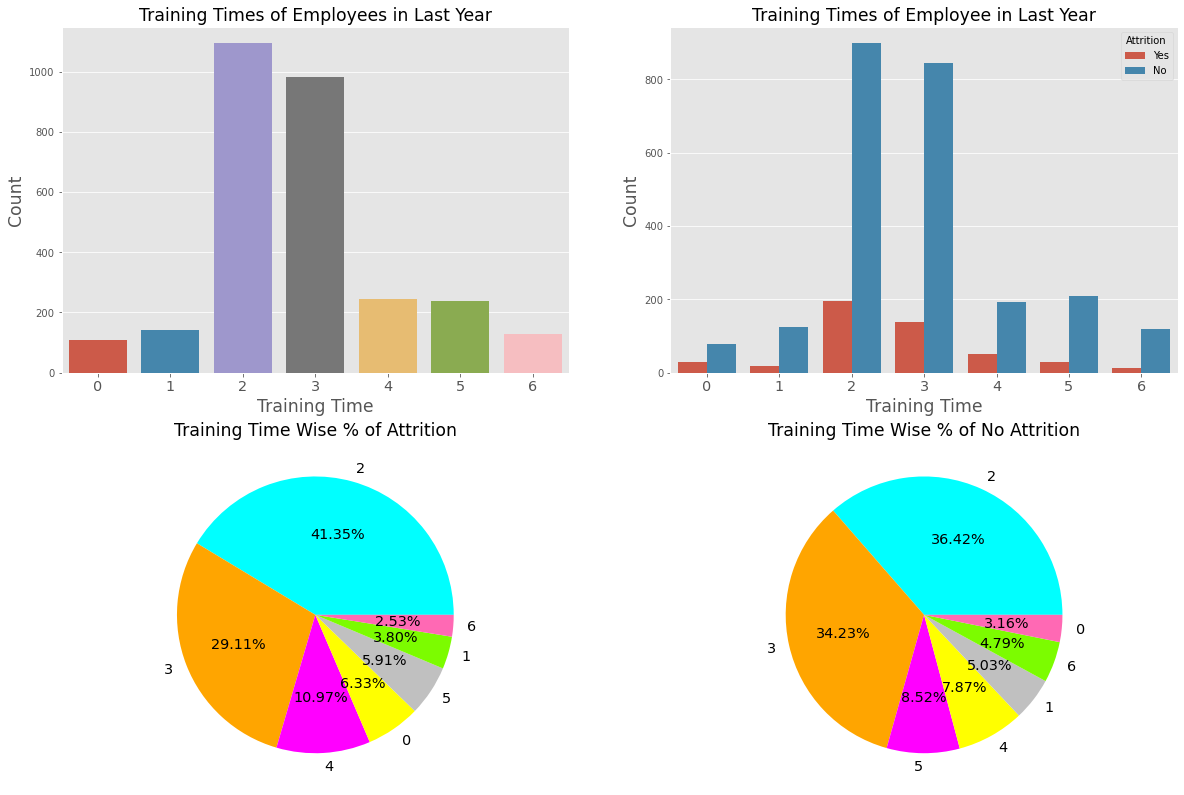

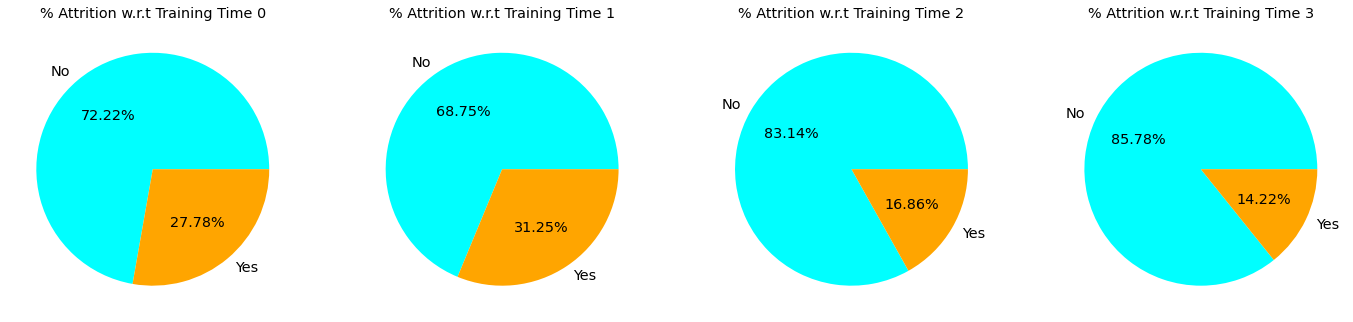

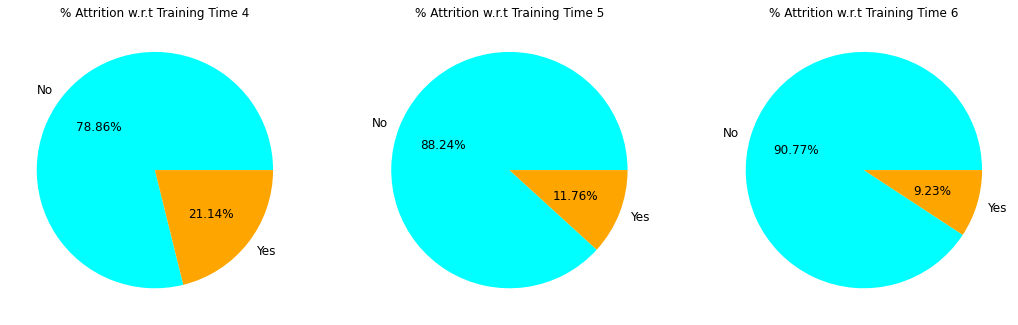

In [57]:
plt.subplots(2,2,figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(x='TrainingTimesLastYear',data=df)
plt.title('Training Times of Employees in Last Year',fontdict={'fontsize':'xx-large'})
plt.xlabel('Training Time',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='TrainingTimesLastYear',data=df,hue='Attrition')
plt.title('Training Times of Employee in Last Year',fontdict={'fontsize':'xx-large'})
plt.xlabel('Training Time',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['TrainingTimesLastYear'].value_counts(),labels=Attrition_yes['TrainingTimesLastYear'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','silver','lawngreen','hotpink'])
plt.title('Training Time Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['TrainingTimesLastYear'].value_counts(),labels=Attrition_no['TrainingTimesLastYear'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','silver','lawngreen','hotpink'])
plt.title('Training Time Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,4,figsize=(24,10))

plt.subplot(1,4,1)
plt.pie(df[df['TrainingTimesLastYear']==0]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Training Time 0',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,2)
plt.pie(df[df['WorkLifeBalance']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Training Time 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,3)
plt.pie(df[df['WorkLifeBalance']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Training Time 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,4)
plt.pie(df[df['WorkLifeBalance']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Training Time 3',fontdict={'fontsize':'x-large'})

plt.subplots(1,3,figsize=(18,10))

plt.subplot(1,3,1)
plt.pie(df[df['TrainingTimesLastYear']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Training Time 4',fontdict={'fontsize':'large'})

plt.subplot(1,3,2)
plt.pie(df[df['TrainingTimesLastYear']==5]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Training Time 5',fontdict={'fontsize':'large'})

plt.subplot(1,3,3)
plt.pie(df[df['TrainingTimesLastYear']==6]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Training Time 6',fontdict={'fontsize':'large'})

plt.show()

# Observation
Most of the employees with training time =1 have left the job

## Effect of Gender :

In [58]:
df['Gender'].value_counts()

Male      1764
Female    1176
Name: Gender, dtype: int64

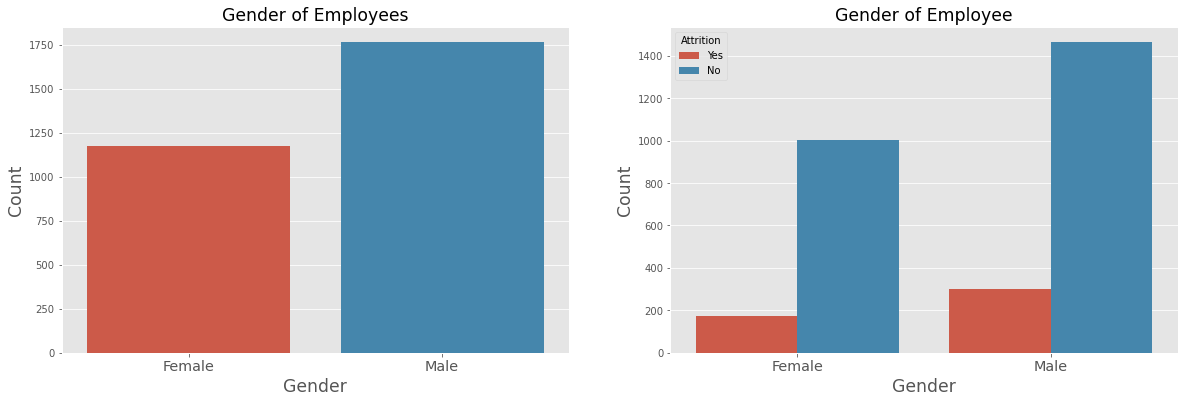

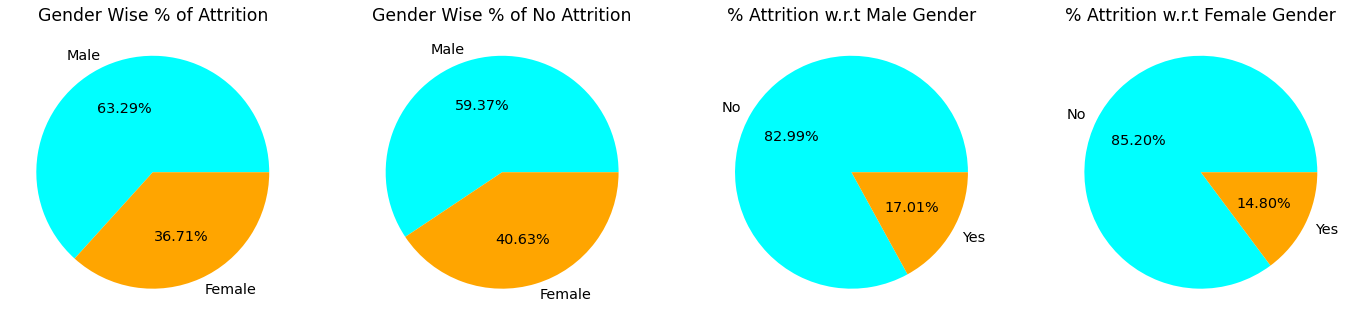

In [59]:
plt.subplots(1,2,figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x='Gender',data=df)
plt.title('Gender of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Gender',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(1,2,2)
sns.countplot(x='Gender',data=df,hue='Attrition')
plt.title('Gender of Employee',fontdict={'fontsize':'xx-large'})
plt.xlabel('Gender',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplots(1,4,figsize=(24,7))

plt.subplot(1,4,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['Gender'].value_counts(),labels=Attrition_yes['Gender'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('Gender Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['Gender'].value_counts(),labels=Attrition_no['Gender'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('Gender Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,3)
plt.pie(df[df['Gender']=='Male']['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Male Gender',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,4)
plt.pie(df[df['Gender']=='Female']['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Female Gender',fontdict={'fontsize':'xx-large'})

plt.show()

# Observation 
Most of the male employees have left the job

## Effect of Marital Status :

In [60]:
df['MaritalStatus'].value_counts()

Married     1346
Single       940
Divorced     654
Name: MaritalStatus, dtype: int64

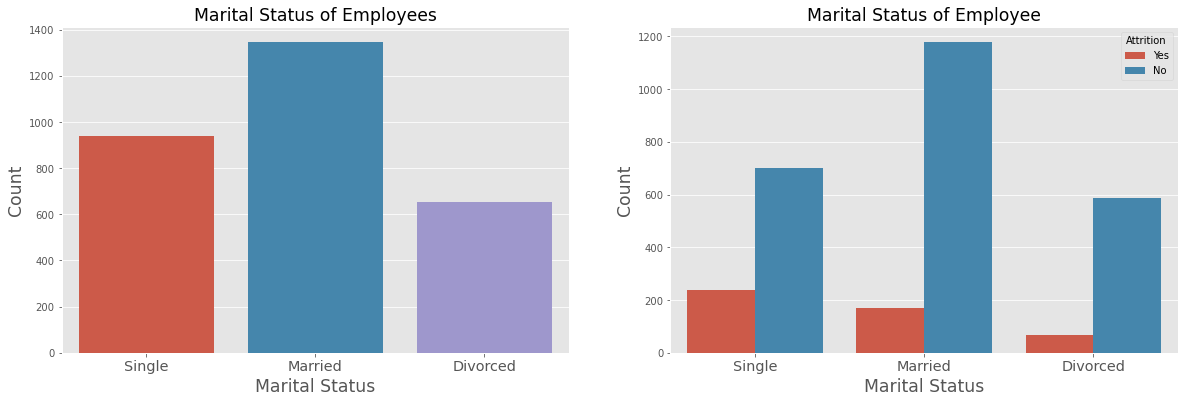

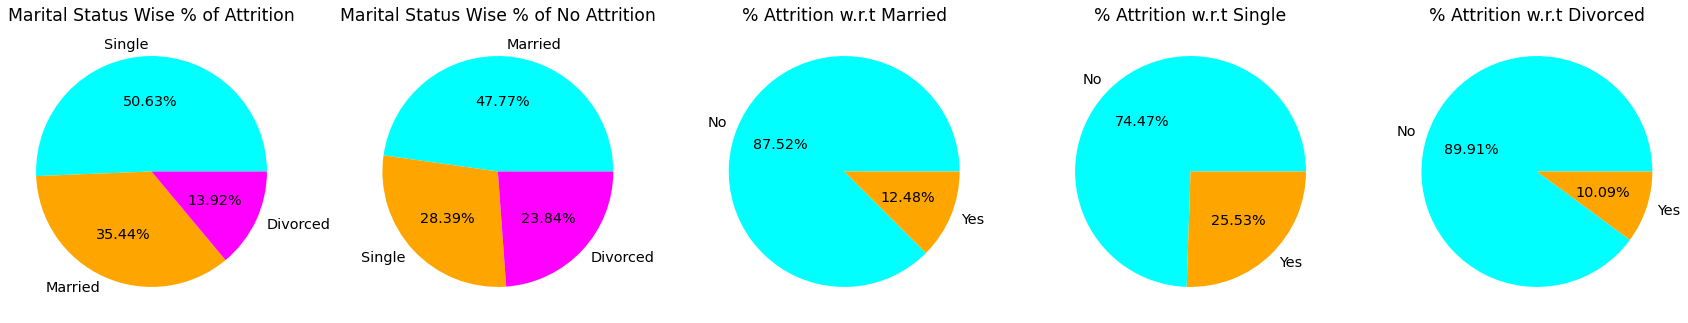

In [61]:
plt.subplots(1,2,figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x='MaritalStatus',data=df)
plt.title('Marital Status of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Marital Status',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(1,2,2)
sns.countplot(x='MaritalStatus',data=df,hue='Attrition')
plt.title('Marital Status of Employee',fontdict={'fontsize':'xx-large'})
plt.xlabel('Marital Status',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplots(1,5,figsize=(30,8))

plt.subplot(1,5,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['MaritalStatus'].value_counts(),labels=Attrition_yes['MaritalStatus'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Marital Status Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,5,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['MaritalStatus'].value_counts(),labels=Attrition_no['MaritalStatus'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Marital Status Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,5,3)
plt.pie(df[df['MaritalStatus']=='Married']['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Married',fontdict={'fontsize':'xx-large'})

plt.subplot(1,5,4)
plt.pie(df[df['MaritalStatus']=='Single']['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Single',fontdict={'fontsize':'xx-large'})

plt.subplot(1,5,5)
plt.pie(df[df['MaritalStatus']=='Divorced']['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Divorced',fontdict={'fontsize':'xx-large'})

plt.show()

# Observation 
most of the employees with marrital Status as single have left the job

## Effect of Stock Option Level :

In [62]:
df['StockOptionLevel'].value_counts()

0    1262
1    1192
2     316
3     170
Name: StockOptionLevel, dtype: int64

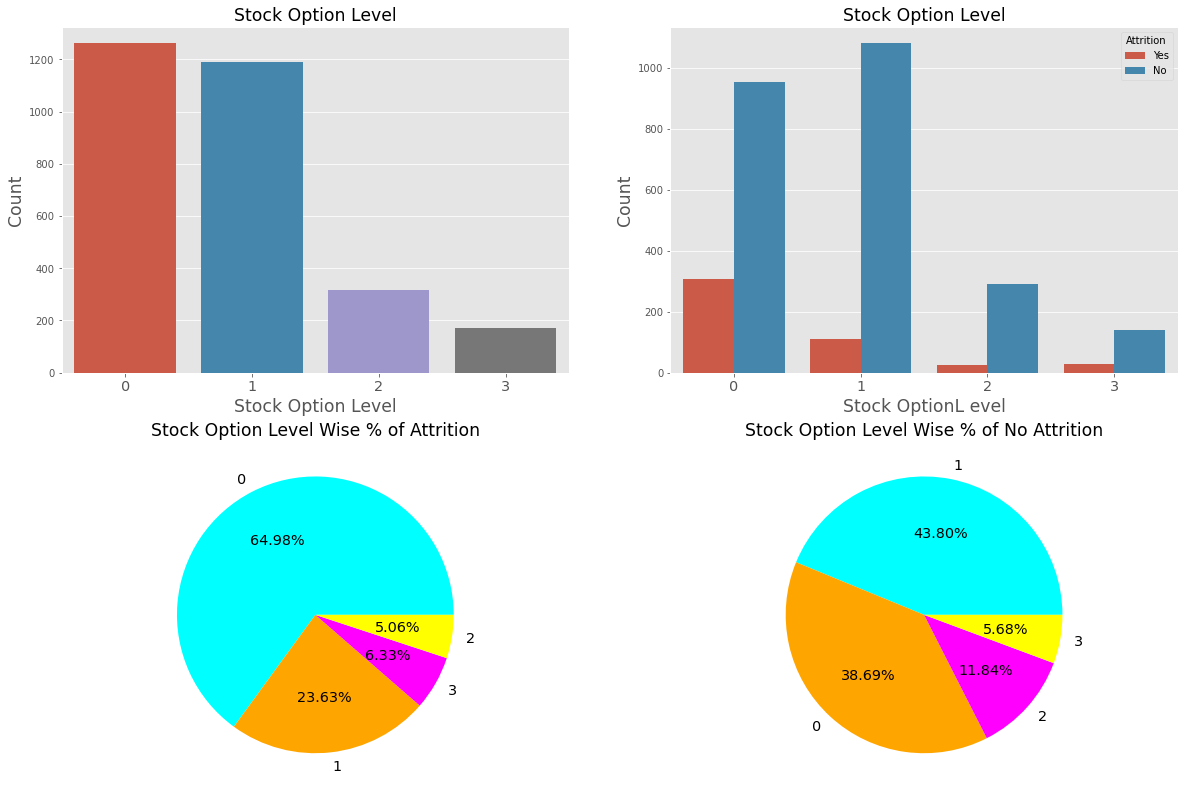

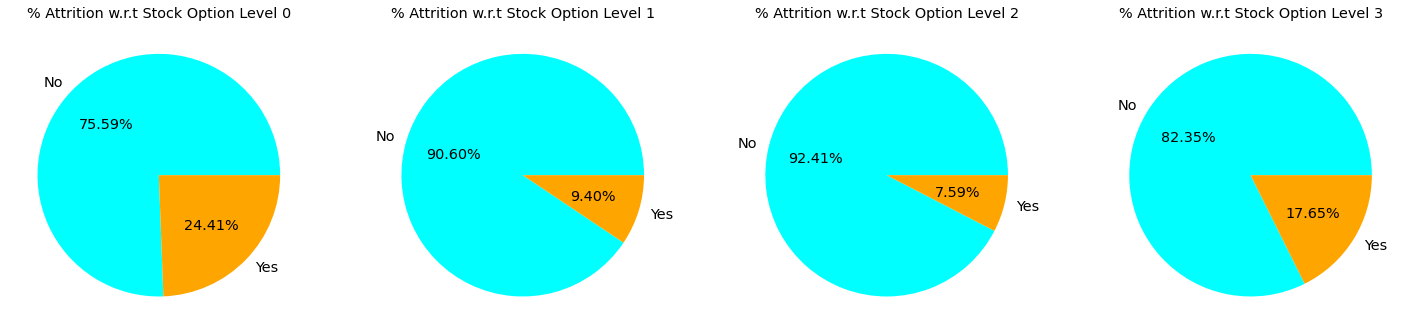

In [63]:
plt.subplots(2,2,figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(x='StockOptionLevel',data=df)
plt.title('Stock Option Level',fontdict={'fontsize':'xx-large'})
plt.xlabel('Stock Option Level',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='StockOptionLevel',data=df,hue='Attrition')
plt.title('Stock Option Level',fontdict={'fontsize':'xx-large'})
plt.xlabel('Stock OptionL evel',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['StockOptionLevel'].value_counts(),labels=Attrition_yes['StockOptionLevel'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','silver'])
plt.title('Stock Option Level Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['StockOptionLevel'].value_counts(),labels=Attrition_no['StockOptionLevel'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','silver'])
plt.title('Stock Option Level Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,4,figsize=(25,10))

plt.subplot(1,4,1)
plt.pie(df[df['StockOptionLevel']==0]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Stock Option Level 0',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,2)
plt.pie(df[df['StockOptionLevel']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Stock Option Level 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,3)
plt.pie(df[df['StockOptionLevel']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Stock Option Level 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,4)
plt.pie(df[df['StockOptionLevel']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Stock Option Level 3',fontdict={'fontsize':'x-large'})

plt.show()

# Observation 
Most of the employees with Stock Option level 0 have left the job

## Effect of Over Time :

In [64]:
df['OverTime'].value_counts()

No     2108
Yes     832
Name: OverTime, dtype: int64

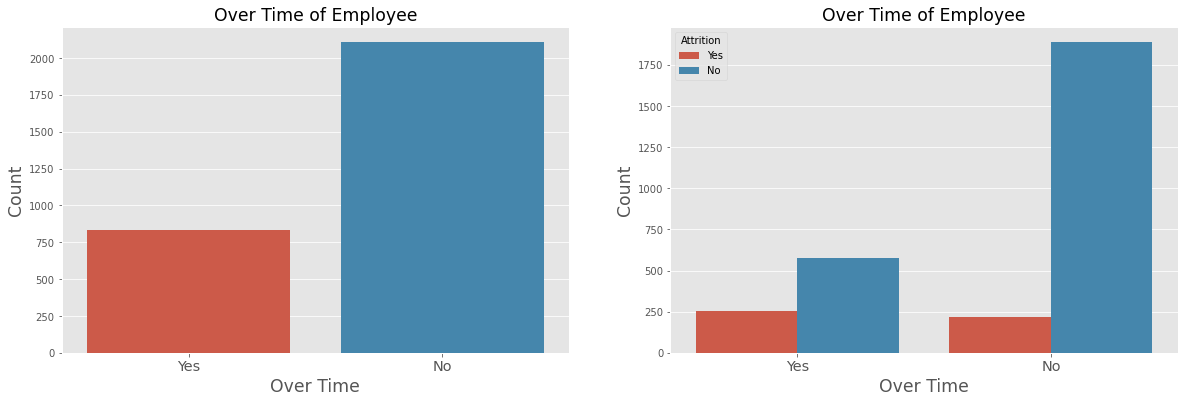

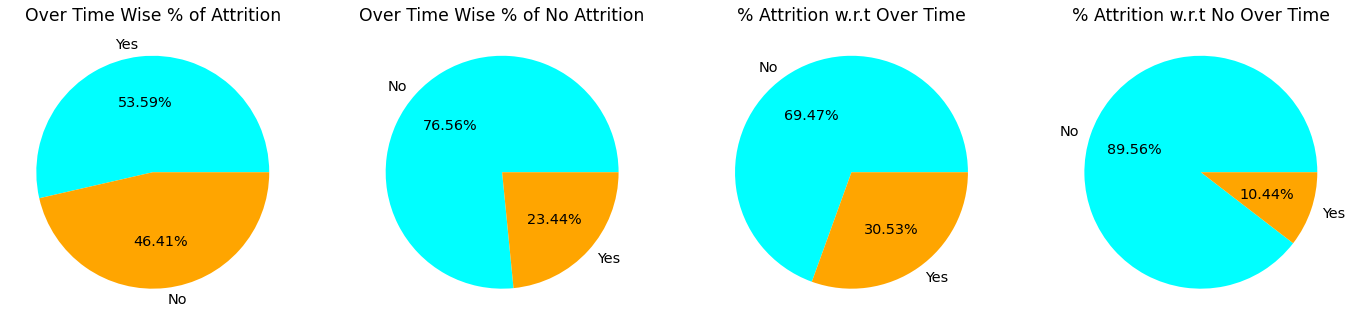

In [65]:
plt.subplots(1,2,figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x='OverTime',data=df)
plt.title('Over Time of Employee',fontdict={'fontsize':'xx-large'})
plt.xlabel('Over Time',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(1,2,2)
sns.countplot(x='OverTime',data=df,hue='Attrition')
plt.title('Over Time of Employee',fontdict={'fontsize':'xx-large'})
plt.xlabel('Over Time',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplots(1,4,figsize=(24,10))

plt.subplot(1,4,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['OverTime'].value_counts(),labels=Attrition_yes['OverTime'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('Over Time Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['OverTime'].value_counts(),labels=Attrition_no['OverTime'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('Over Time Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,3)
plt.pie(df[df['OverTime']=='Yes']['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Over Time',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,4)
plt.pie(df[df['OverTime']=='No']['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t No Over Time',fontdict={'fontsize':'xx-large'})

plt.show()

# Observation 
Most of the employees doing overtime has left the job

In [66]:
df_num = df.select_dtypes(include = 'number')
df_cat = df.select_dtypes(include = 'object')

In [67]:
df_num.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0          94               3         2                4           5993   
1          61               2         2                2           5130   
2          92               2         1                3           2090   
3          56               3         1                3           2909   
4          40               3         1                2           3468   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0        19479                   8                 11                  3   
1        24907                   1                 23                  4   
2         2396                   6                 15                  3   
3        23159                   1                 11                  3   
4        16632                   9                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [68]:
df_cat.head()

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently  Research & Development  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus OverTime  
0        Sales Executive        Single      Yes  
1     Research Scientist       Married       No  
2  Laboratory Technician        Single      Yes  
3     Research Scientist       Married      Yes  
4  Laboratory Technician       Married       No

## Columns with Continuous Variables :

In [69]:
df_cont=df[['MonthlyIncome','MonthlyRate','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
            'YearsSinceLastPromotion','YearsWithCurrManager']]

In [70]:
df_cont.head()

MonthlyIncome  MonthlyRate  TotalWorkingYears  YearsAtCompany  \
0           5993        19479                  8               6   
1           5130        24907                 10              10   
2           2090         2396                  7               0   
3           2909        23159                  8               8   
4           3468        16632                  6               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2

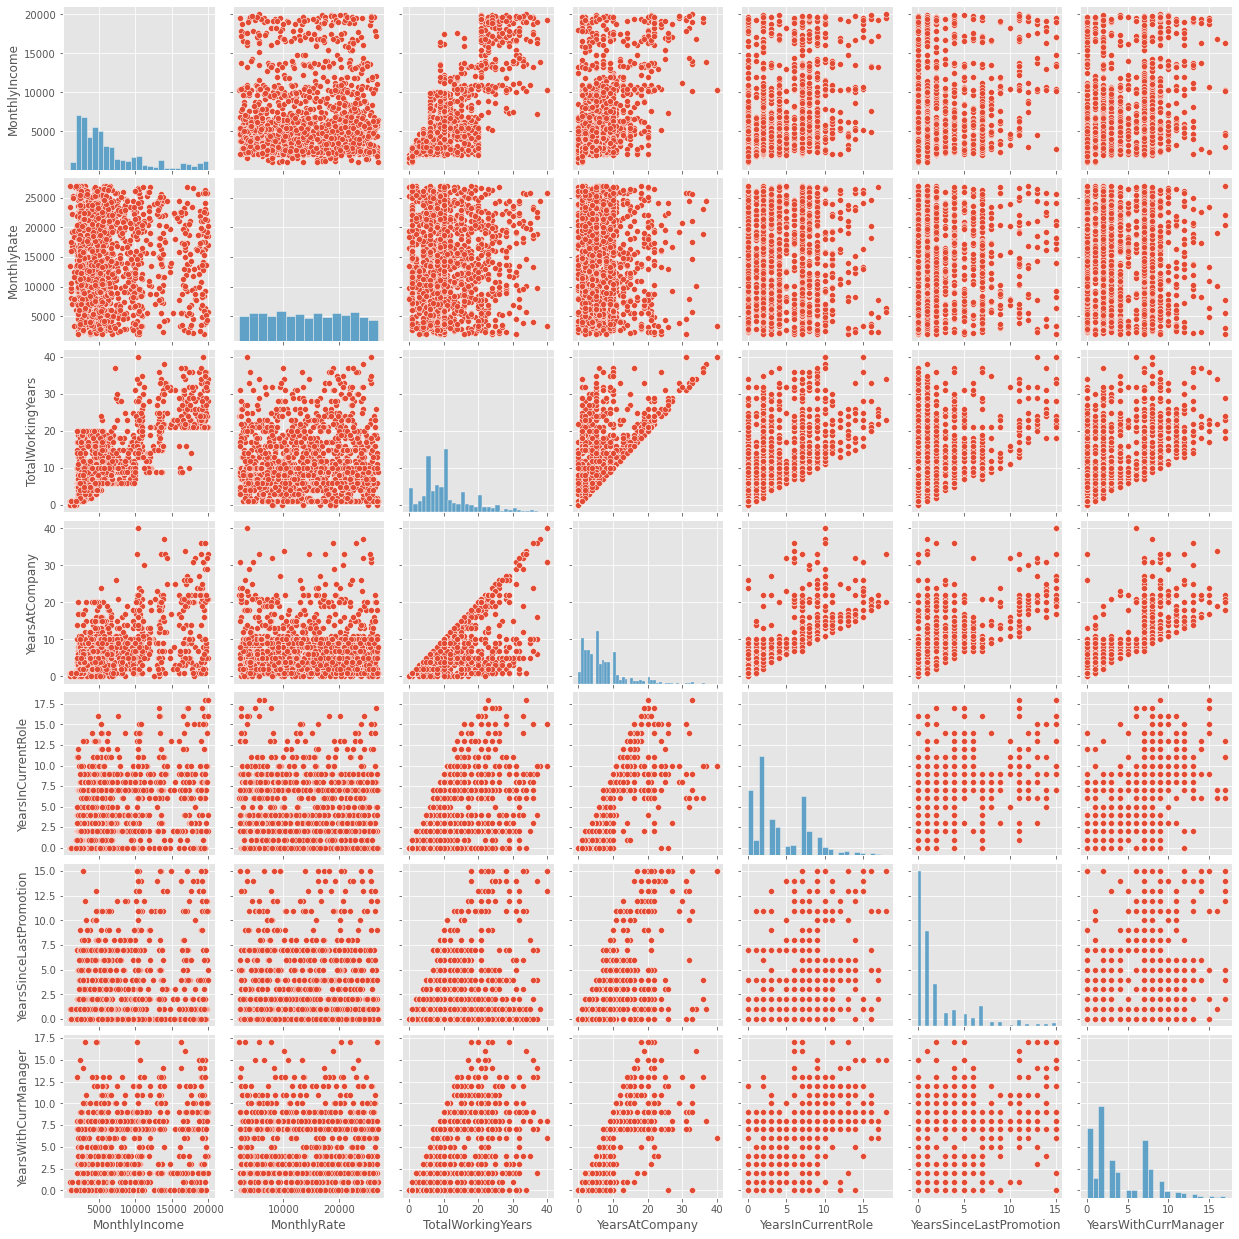

In [71]:
sns.pairplot(df_cont)

<AxesSubplot:>

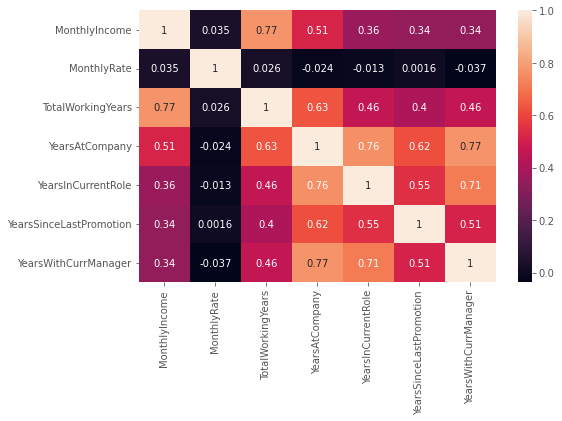

In [72]:
plt.figure(figsize=(8,5))
sns.heatmap(df_cont.corr(),annot=True)

## No correlation between the above variables

## Effect of Monthly Income and Monthly Rate:

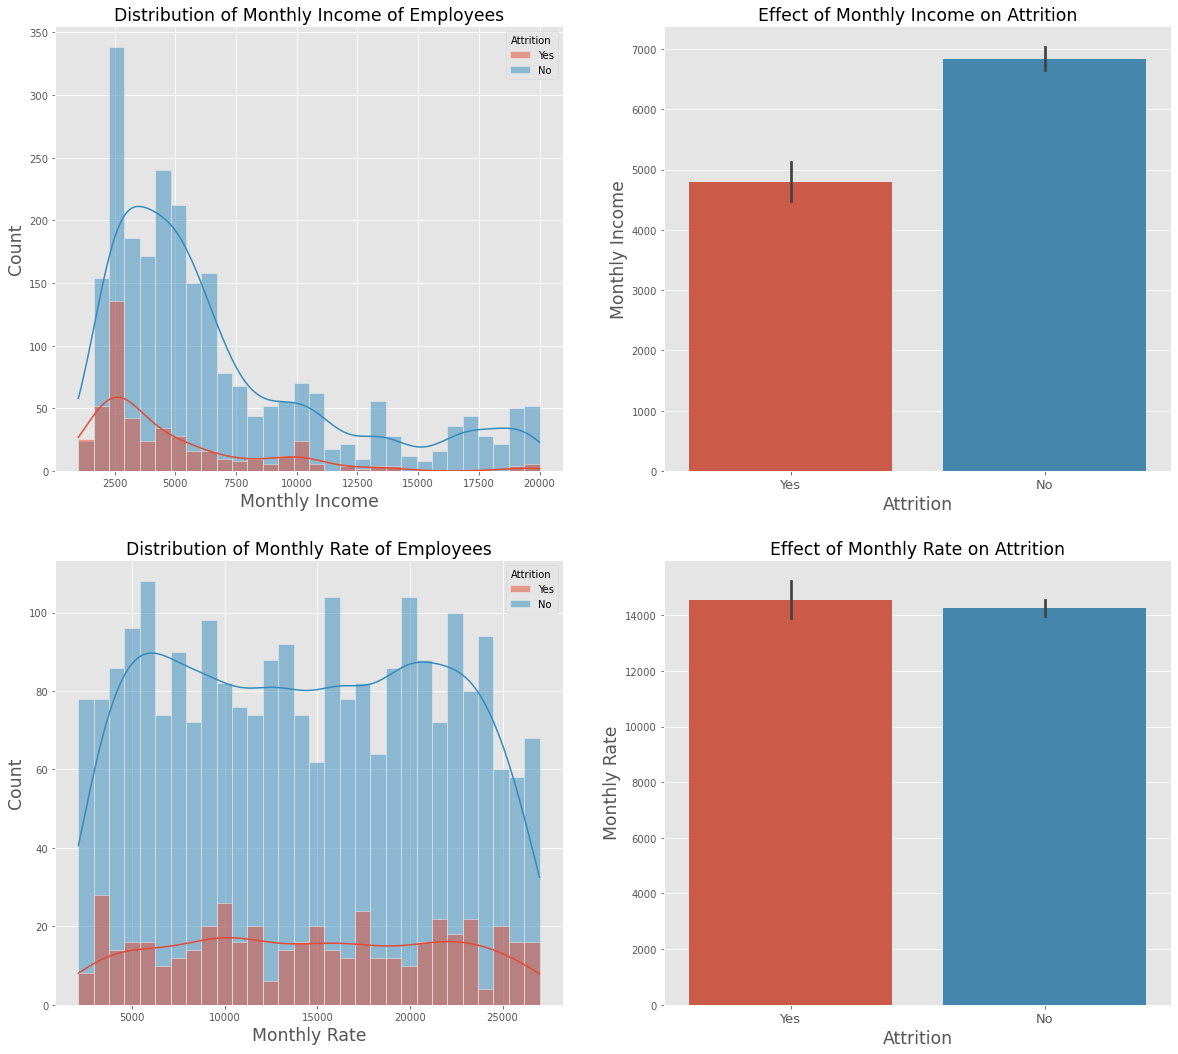

In [73]:
plt.subplots(2,2,figsize=(20,18))

plt.subplot(2,2,1)
sns.histplot(x='MonthlyIncome',data=df,kde=True,bins=30,hue='Attrition')
plt.title('Distribution of Monthly Income of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Monthly Income',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,2)
sns.barplot(x='Attrition',y='MonthlyIncome',data=df)
plt.title('Effect of Monthly Income on Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Monthly Income',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)

plt.subplot(2,2,3)
sns.histplot(x='MonthlyRate',data=df,kde=True,bins=30,hue='Attrition')
plt.title('Distribution of Monthly Rate of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Monthly Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
sns.barplot(x='Attrition',y='MonthlyRate',data=df)
plt.title('Effect of Monthly Rate on Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Monthly Rate',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)

plt.show()

## Effect of No. of Companies Worked:

In [74]:
df['NumCompaniesWorked'].value_counts()

1    1042
0     394
3     318
2     292
4     278
7     148
6     140
5     126
9     104
8      98
Name: NumCompaniesWorked, dtype: int64

Text(0.5, 1.0, '% of No Attrition w.r.t No.of Companies Worked')

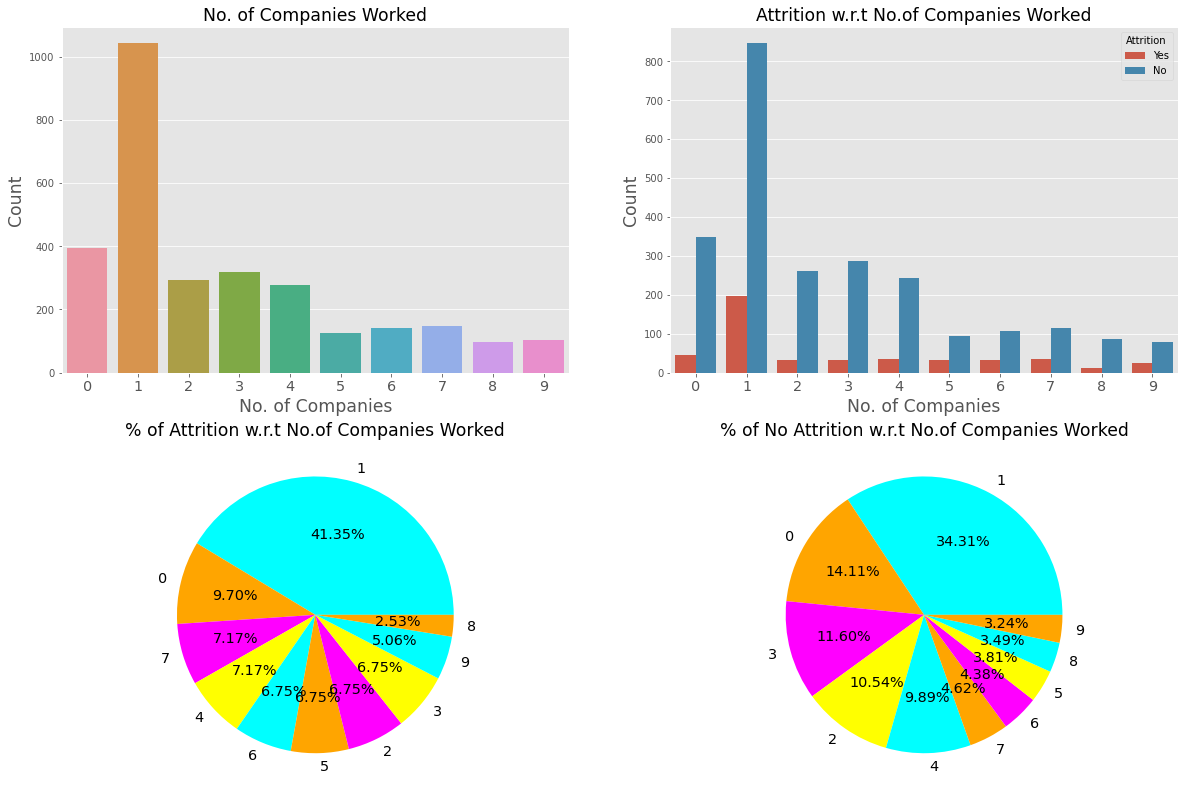

In [75]:
plt.subplots(2,2,figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(x='NumCompaniesWorked',data=df)
plt.title('No. of Companies Worked',fontdict={'fontsize':'xx-large'})
plt.xlabel('No. of Companies',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='NumCompaniesWorked',data=df,hue='Attrition')
plt.title('Attrition w.r.t No.of Companies Worked',fontdict={'fontsize':'xx-large'})
plt.xlabel('No. of Companies',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['NumCompaniesWorked'].value_counts(),labels=Attrition_yes['NumCompaniesWorked'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('% of Attrition w.r.t No.of Companies Worked',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['NumCompaniesWorked'].value_counts(),labels=Attrition_no['NumCompaniesWorked'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('% of No Attrition w.r.t No.of Companies Worked',fontdict={'fontsize':'xx-large'})


# Observation
Most of the employees who worked in one company only have left the job

## Effect of Total Working Years :

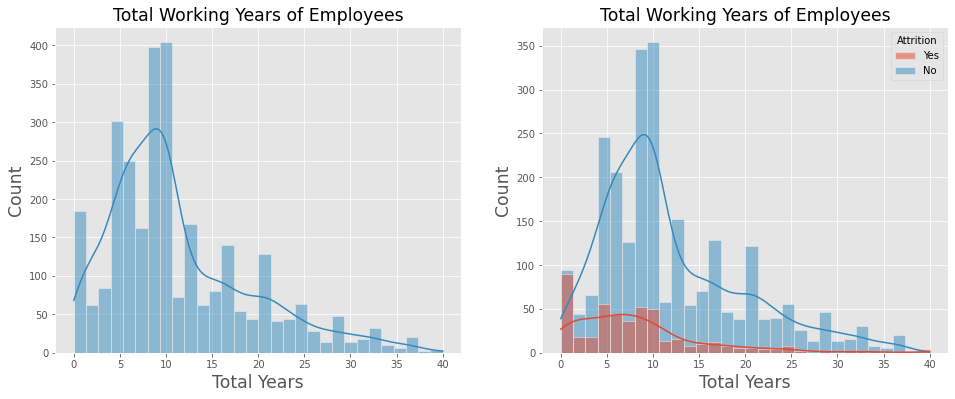

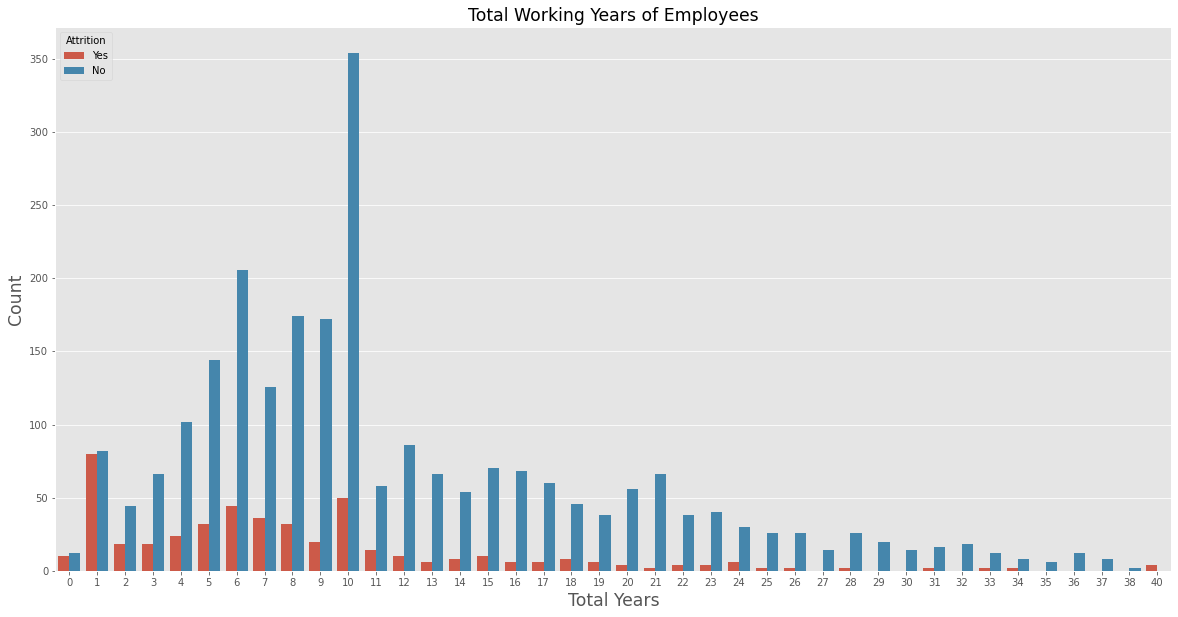

In [76]:
plt.subplots(1,2,figsize=(16,6))

plt.subplot(1,2,1)
sns.histplot(x='TotalWorkingYears',data=df,kde=True,bins=30)
plt.title('Total Working Years of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Total Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
sns.histplot(x='TotalWorkingYears',data=df,kde=True,bins=30,hue='Attrition')
plt.title('Total Working Years of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Total Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.figure(figsize=(20,10))
sns.countplot(x='TotalWorkingYears',data=df,hue='Attrition')
plt.title('Total Working Years of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Total Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.show()

# Observation 
Most of the employees with total years=1 have left the job

## Effect of % Salary Hike :

In [77]:
df['PercentSalaryHike'].value_counts()

11    420
13    418
14    402
12    396
15    202
18    178
17    164
16    156
19    152
22    112
20    110
21     96
23     56
24     42
25     36
Name: PercentSalaryHike, dtype: int64

Text(0.5, 1.0, '% of No Attrition w.r.t % of Salary Hike')

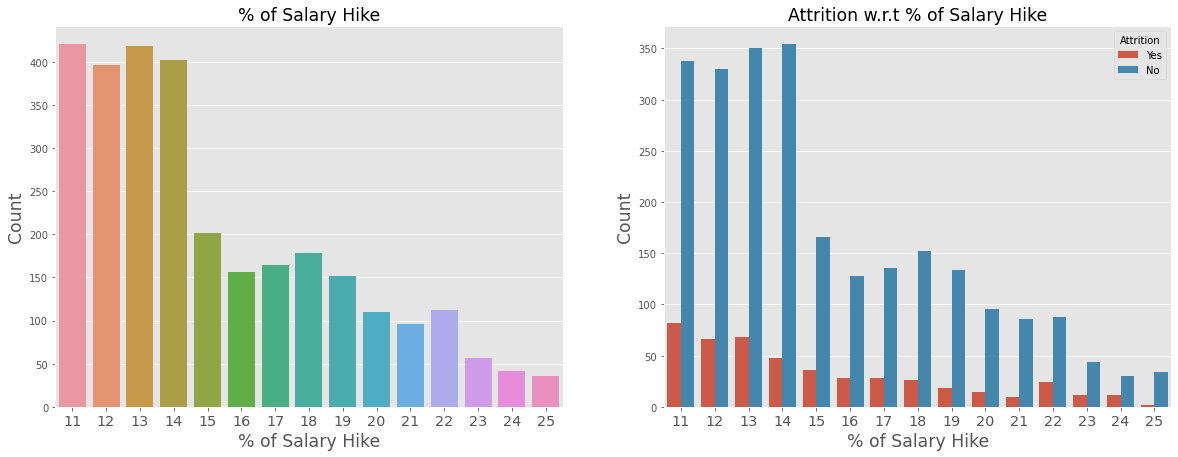

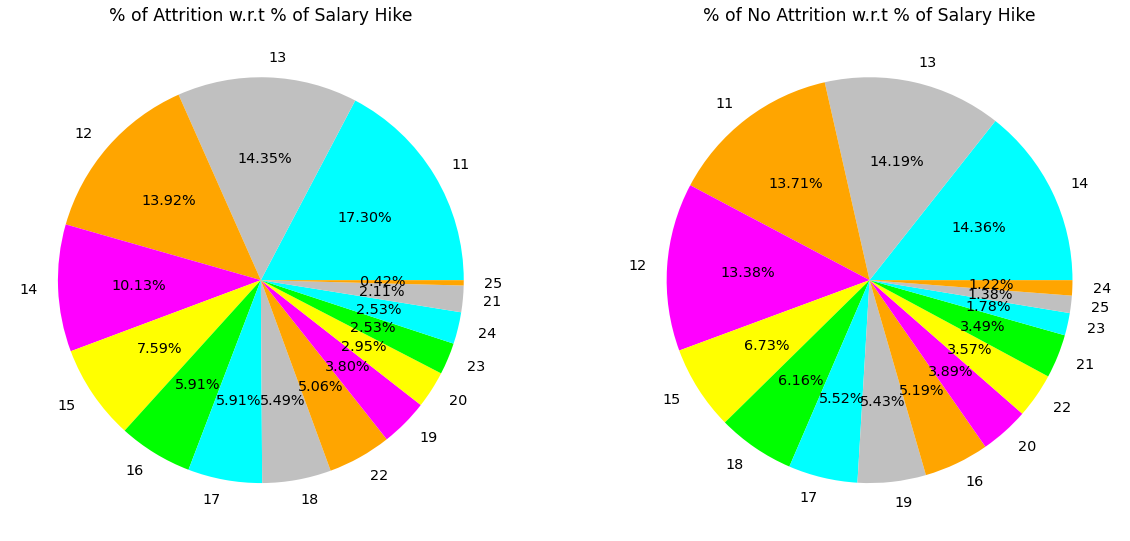

In [78]:
plt.subplots(1,2,figsize=(20,7))

plt.subplot(1,2,1)
sns.countplot(x='PercentSalaryHike',data=df)
plt.title('% of Salary Hike',fontdict={'fontsize':'xx-large'})
plt.xlabel('% of Salary Hike',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(1,2,2)
sns.countplot(x='PercentSalaryHike',data=df,hue='Attrition')
plt.title('Attrition w.r.t % of Salary Hike',fontdict={'fontsize':'xx-large'})
plt.xlabel('% of Salary Hike',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplots(1,2,figsize=(20,10))

plt.subplot(1,2,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['PercentSalaryHike'].value_counts(),labels=Attrition_yes['PercentSalaryHike'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','silver','orange','magenta','yellow','lime'])
plt.title('% of Attrition w.r.t % of Salary Hike',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['PercentSalaryHike'].value_counts(),labels=Attrition_no['PercentSalaryHike'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','silver','orange','magenta','yellow','lime'])
plt.title('% of No Attrition w.r.t % of Salary Hike',fontdict={'fontsize':'xx-large'})

# Observation 
Most of the employees with 11% salary hike have left the job

## Effect of Performance Rating :

In [79]:
df['PerformanceRating'].value_counts()

3    2488
4     452
Name: PerformanceRating, dtype: int64

Text(0.5, 1.0, '% of Attrition w.r.t Performance Rating 4')

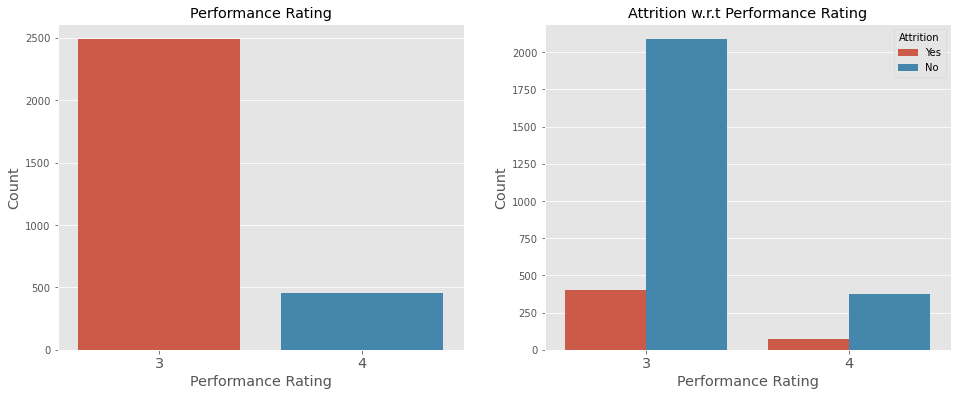

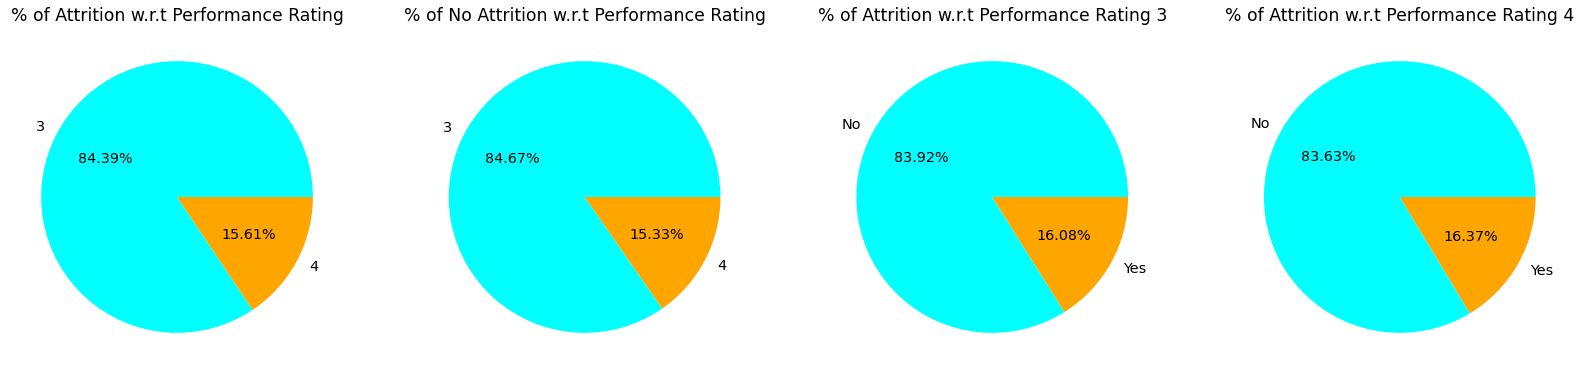

In [80]:
plt.subplots(1,2,figsize=(16,6))

plt.subplot(1,2,1)
sns.countplot(x='PerformanceRating',data=df)
plt.title('Performance Rating',fontdict={'fontsize':'x-large'})
plt.xlabel('Performance Rating',fontdict={'fontsize':'x-large'})
plt.ylabel('Count',fontdict={'fontsize':'x-large'})
plt.xticks(fontsize='x-large')

plt.subplot(1,2,2)
sns.countplot(x='PerformanceRating',data=df,hue='Attrition')
plt.title('Attrition w.r.t Performance Rating',fontdict={'fontsize':'x-large'})
plt.xlabel('Performance Rating',fontdict={'fontsize':'x-large'})
plt.ylabel('Count',fontdict={'fontsize':'x-large'})
plt.xticks(fontsize='x-large')

plt.subplots(1,4,figsize=(28,14))

plt.subplot(1,4,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['PerformanceRating'].value_counts(),labels=Attrition_yes['PerformanceRating'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Performance Rating',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['PerformanceRating'].value_counts(),labels=Attrition_no['PerformanceRating'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of No Attrition w.r.t Performance Rating',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,3)
plt.pie(df[df['PerformanceRating']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Performance Rating 3',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,4)
plt.pie(df[df['PerformanceRating']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Performance Rating 4',fontdict={'fontsize':'xx-large'})


# Observation
Most of the employees with Performance rating =3 have left the job

## Effect of Years at Company :

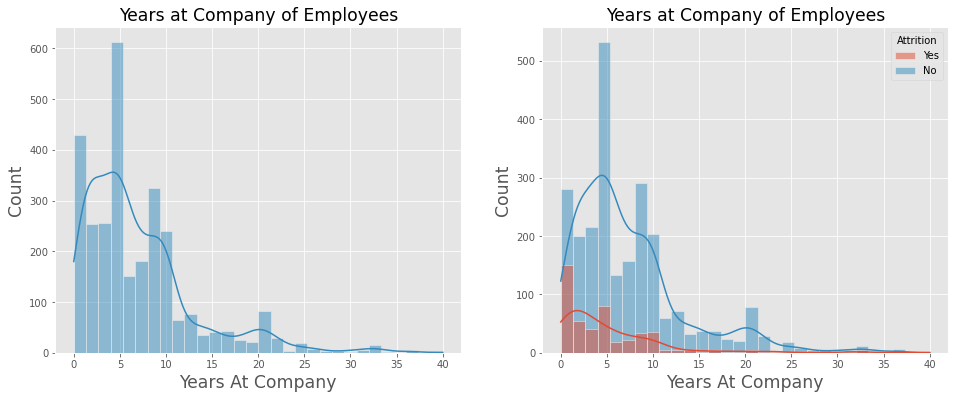

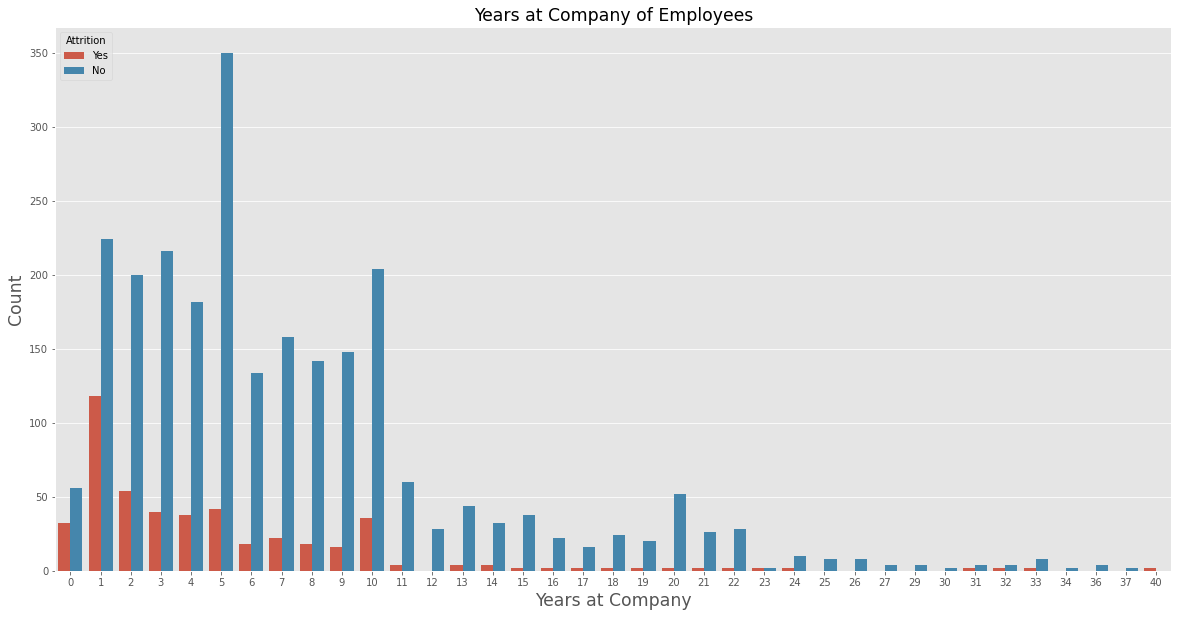

In [81]:
plt.subplots(1,2,figsize=(16,6))

plt.subplot(1,2,1)
sns.histplot(x='YearsAtCompany',data=df,kde=True,bins=30)
plt.title('Years at Company of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years At Company',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
sns.histplot(x='YearsAtCompany',data=df,kde=True,bins=30,hue='Attrition')
plt.title('Years at Company of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years At Company',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.figure(figsize=(20,10))
sns.countplot(x='YearsAtCompany',data=df,hue='Attrition')
plt.title('Years at Company of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years at Company',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.show()

## Job Involvement and Job Satisfaction w.r.t Years At Company :

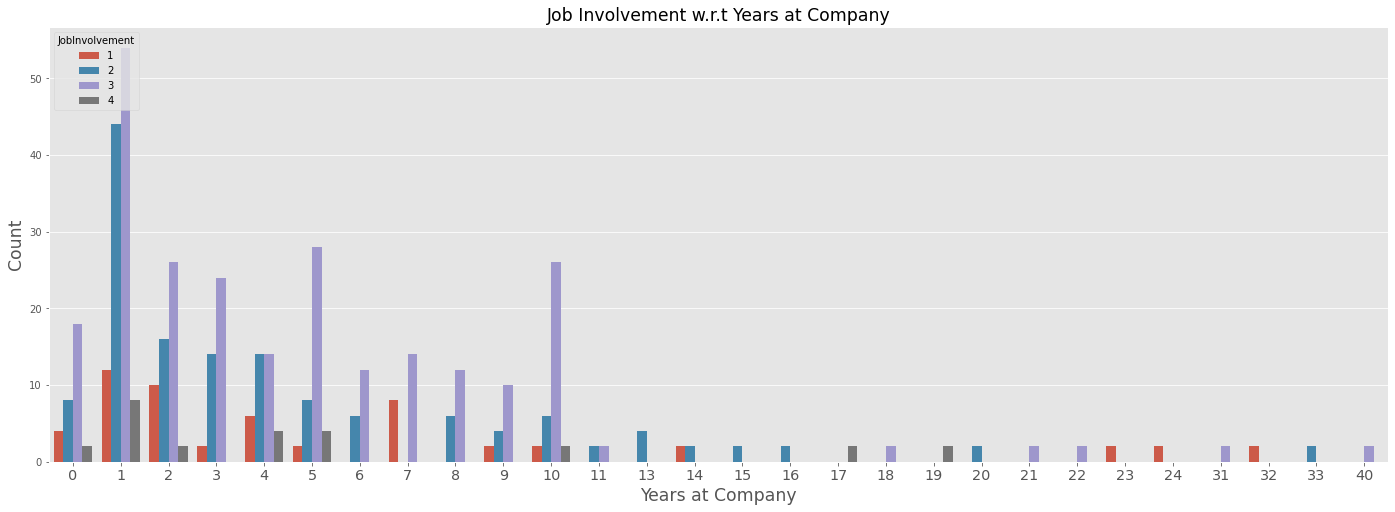

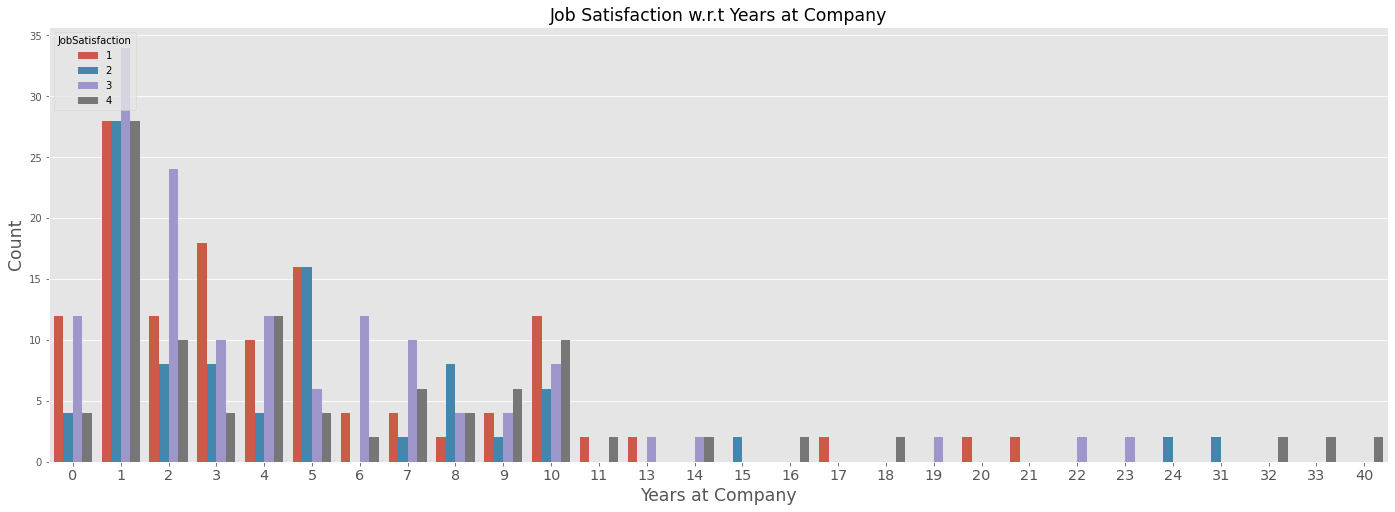

In [82]:
plt.figure(figsize=(24,8))
sns.countplot(x='YearsAtCompany',data=df[df['Attrition']=='Yes'],hue='JobInvolvement')
plt.title('Job Involvement w.r.t Years at Company',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years at Company',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.figure(figsize=(24,8))
sns.countplot(x='YearsAtCompany',data=df[df['Attrition']=='Yes'],hue='JobSatisfaction')
plt.title('Job Satisfaction w.r.t Years at Company',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years at Company',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.show()

## Effect of Years Since Last Promotion :

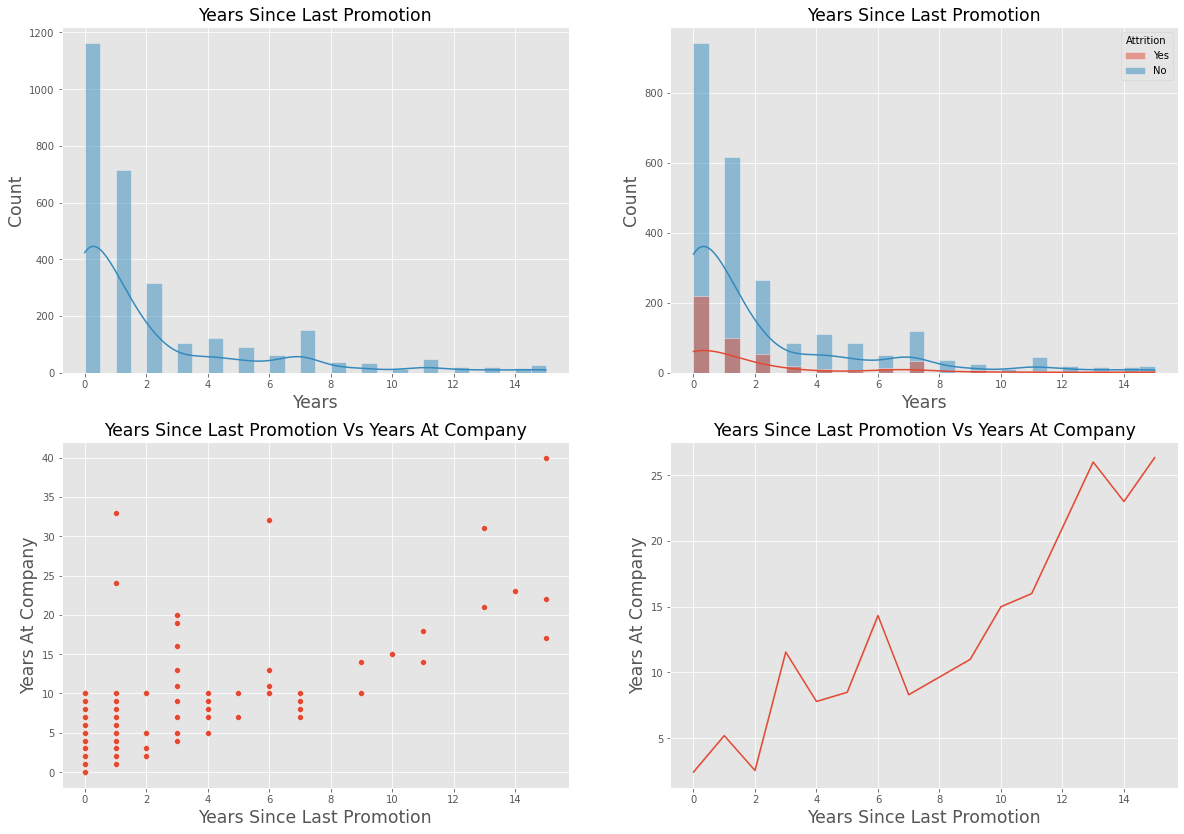

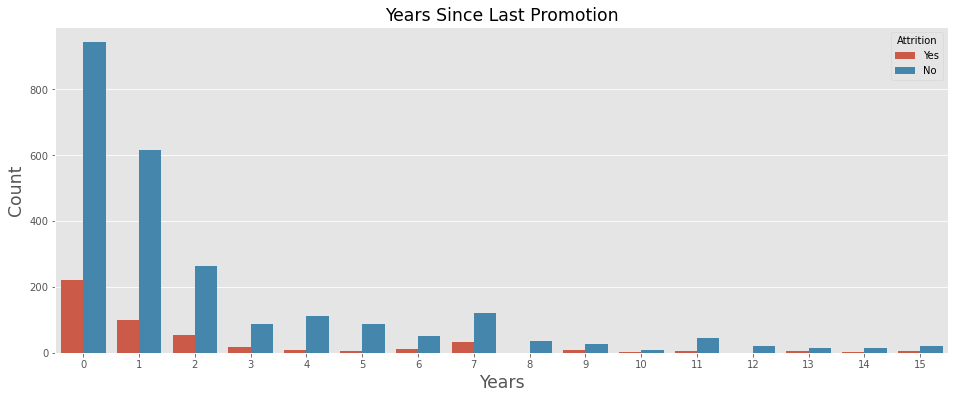

In [83]:
plt.subplots(2,2,figsize=(20,14))

plt.subplot(2,2,1)
sns.histplot(x='YearsSinceLastPromotion',data=df,kde=True,bins=30)
plt.title('Years Since Last Promotion',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,2)
sns.histplot(x='YearsSinceLastPromotion',data=df,kde=True,bins=30,hue='Attrition')
plt.title('Years Since Last Promotion',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,3)
sns.scatterplot(x='YearsSinceLastPromotion',y='YearsAtCompany',data=df[df['Attrition']=='Yes'])
plt.title('Years Since Last Promotion Vs Years At Company',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years Since Last Promotion',fontdict={'fontsize':'xx-large'})
plt.ylabel('Years At Company',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
sns.lineplot(x='YearsSinceLastPromotion',y='YearsAtCompany',data=df[df['Attrition']=='Yes'],ci=0)
plt.title('Years Since Last Promotion Vs Years At Company',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years Since Last Promotion',fontdict={'fontsize':'xx-large'})
plt.ylabel('Years At Company',fontdict={'fontsize':'xx-large'})

plt.figure(figsize=(16,6))
sns.countplot(x='YearsSinceLastPromotion',data=df,hue='Attrition')
plt.title('Years Since Last Promotion',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.show()

## Effect of Years With Current Manager and Years In Current Role:

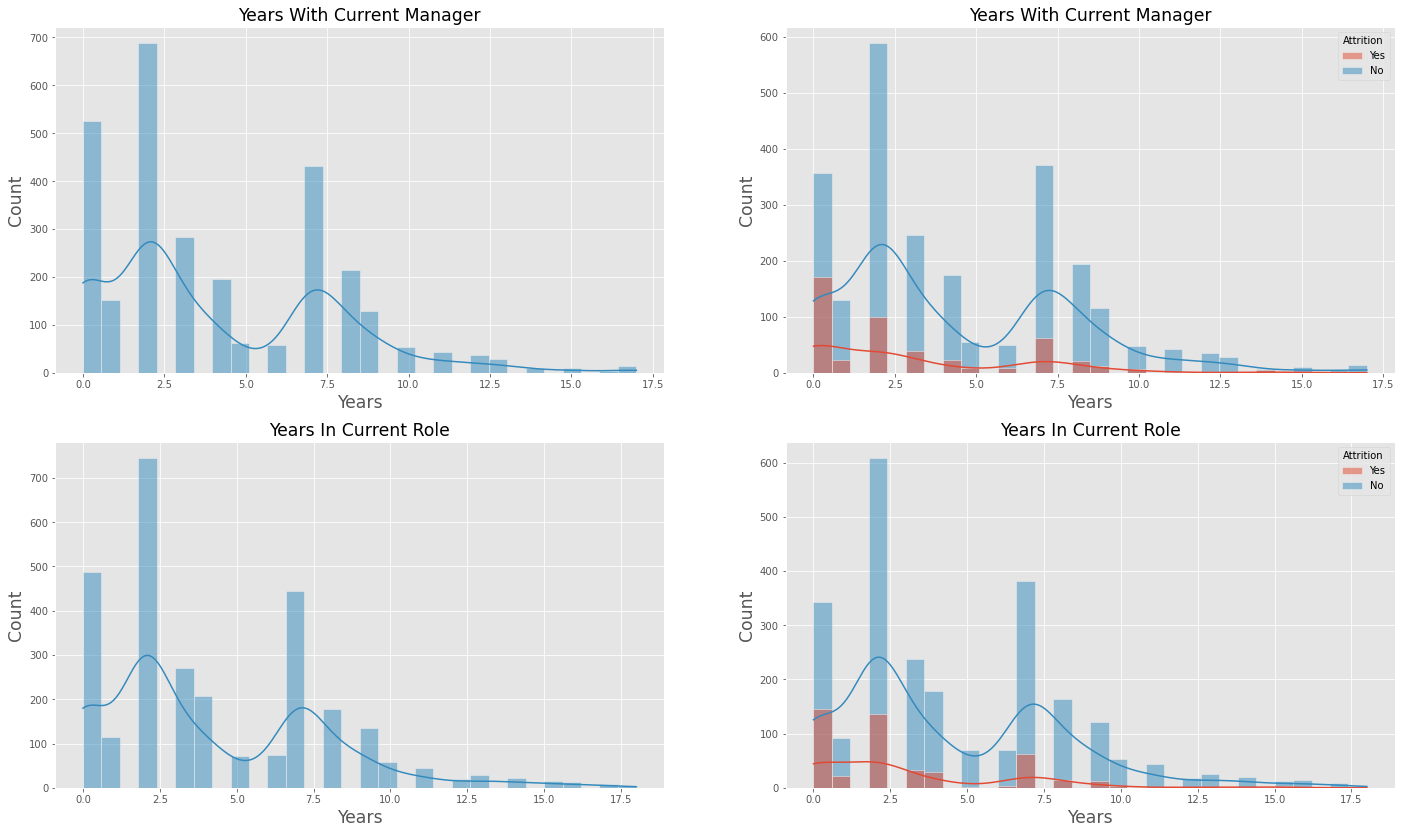

In [84]:
plt.subplots(2,2,figsize=(24,14))

plt.subplot(2,2,1)
sns.histplot(x='YearsWithCurrManager',data=df,kde=True,bins=30)
plt.title('Years With Current Manager',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,2)
sns.histplot(x='YearsWithCurrManager',data=df,kde=True,bins=30,hue='Attrition')
plt.title('Years With Current Manager',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,3)
sns.histplot(x='YearsInCurrentRole',data=df,kde=True,bins=30)
plt.title('Years In Current Role',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
sns.histplot(x='YearsInCurrentRole',data=df,kde=True,bins=30,hue='Attrition')
plt.title('Years In Current Role',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.show()

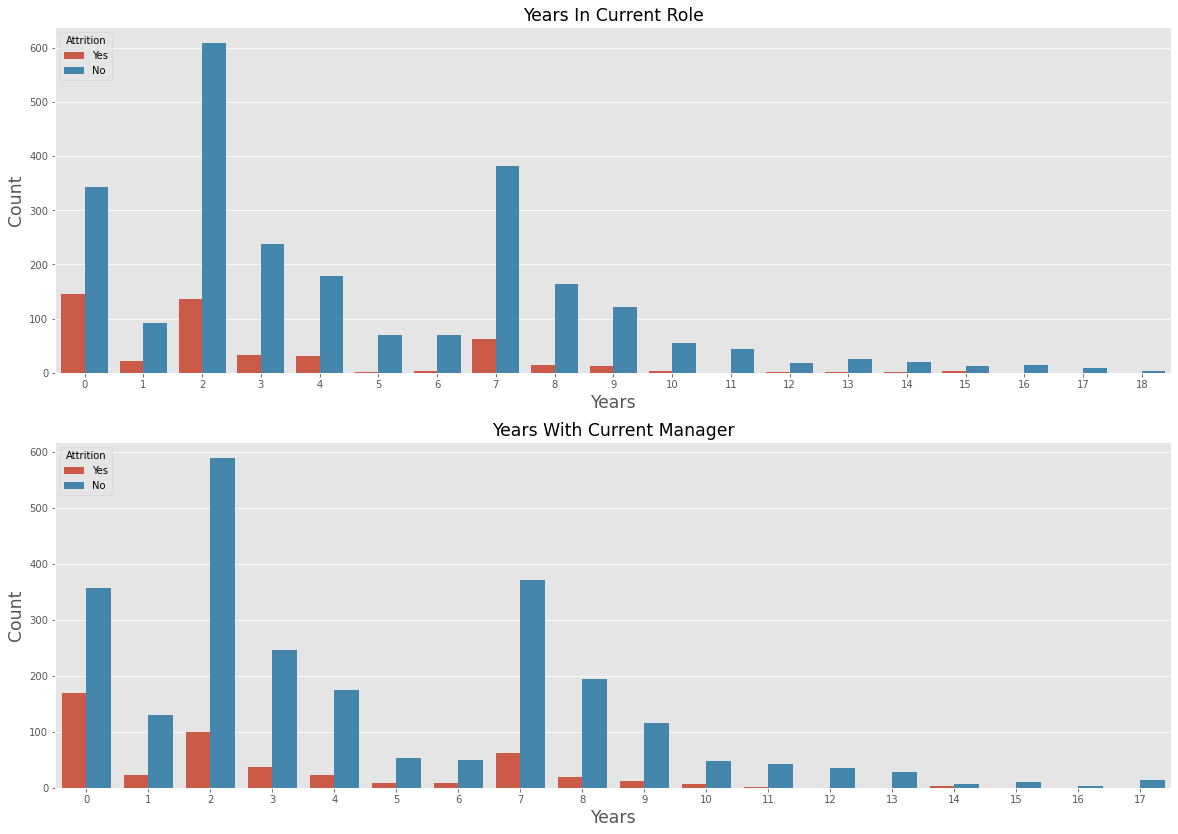

In [85]:
plt.subplots(2,1,figsize=(20,14))

plt.subplot(2,1,1)
sns.countplot(x='YearsInCurrentRole',data=df,hue='Attrition')
plt.title('Years In Current Role',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,1,2)
sns.countplot(x='YearsWithCurrManager',data=df,hue='Attrition')
plt.title('Years With Current Manager',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.show()

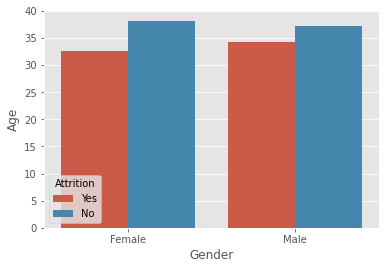

In [86]:
plt.subplots(figsize=(6,4))
sns.barplot(x='Gender',y='Age',hue='Attrition',data=df,ci=False);

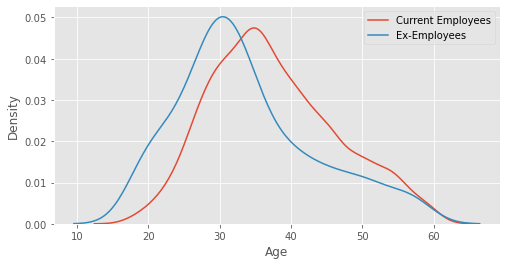

In [87]:
plt.subplots(figsize=(8,4))
sns.kdeplot(df.loc[df.Attrition=='No','Age'],label='Current Employees')
sns.kdeplot(df.loc[df.Attrition=='Yes','Age'],label='Ex-Employees')
plt.legend();

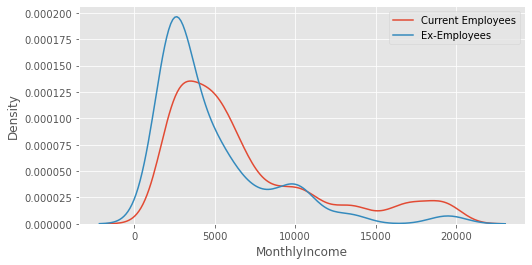

In [88]:
plt.subplots(figsize=(8,4))
sns.kdeplot(df.loc[df.Attrition=='No','MonthlyIncome'],label='Current Employees')
sns.kdeplot(df.loc[df.Attrition=='Yes','MonthlyIncome'],label='Ex-Employees')
plt.legend();

In [89]:
df.loc[df.Attrition=='No','MonthlyIncome']

1       5130
3       2909
4       3468
5       3068
6       2670
        ... 
2935    2571
2936    9991
2937    6142
2938    5390
2939    4404
Name: MonthlyIncome, Length: 2466, dtype: int64

#MODEL BUILDING

In [90]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EnvironmentSatisfaction   2940 non-null   int64 
 9   Gender                    2940 non-null   object
 10  HourlyRate                2940 non-null   int64 
 11  JobInvolvement            2940 non-null   int64 
 12  JobLevel                  2940 non-null   int64 
 13  JobRole                   2940 non-null   object
 14  JobSatisfaction         

In [92]:
df.skew()

Age                         0.413075
DailyRate                  -0.003517
DistanceFromHome            0.957629
Education                  -0.289533
EnvironmentSatisfaction    -0.321490
HourlyRate                 -0.032294
JobInvolvement             -0.498165
JobLevel                    1.024878
JobSatisfaction            -0.329504
MonthlyIncome               1.369117
MonthlyRate                 0.018568
NumCompaniesWorked          1.025947
PercentSalaryHike           0.820709
PerformanceRating           1.920901
RelationshipSatisfaction   -0.302673
StockOptionLevel            0.968485
TotalWorkingYears           1.116601
TrainingTimesLastYear       0.552842
WorkLifeBalance            -0.552198
YearsAtCompany              1.763628
YearsInCurrentRole          0.916895
YearsSinceLastPromotion     1.983277
YearsWithCurrManager        0.833025
dtype: float64

In [93]:
df.kurtosis()

Age                        -0.405500
DailyRate                  -1.203817
DistanceFromHome           -0.226493
Education                  -0.560206
EnvironmentSatisfaction    -1.202517
HourlyRate                 -1.196405
JobInvolvement              0.268496
JobLevel                    0.396431
JobSatisfaction            -1.222156
MonthlyIncome               1.001480
MonthlyRate                -1.214931
NumCompaniesWorked          0.008154
PercentSalaryHike          -0.302129
PerformanceRating           1.691011
RelationshipSatisfaction   -1.184841
StockOptionLevel            0.361972
TotalWorkingYears           0.914665
TrainingTimesLastYear       0.492109
WorkLifeBalance             0.416705
YearsAtCompany              3.926772
YearsInCurrentRole          0.474566
YearsSinceLastPromotion     3.604485
YearsWithCurrManager        0.168725
dtype: float64

In [94]:
# correlation check

corr = df.corr()

In [95]:
corr

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  \
Age                       0.509604        -0.004892       0.497855   
DailyRate                 0.002966         0.030571       0.007707   
Dis

<AxesSubplot:>

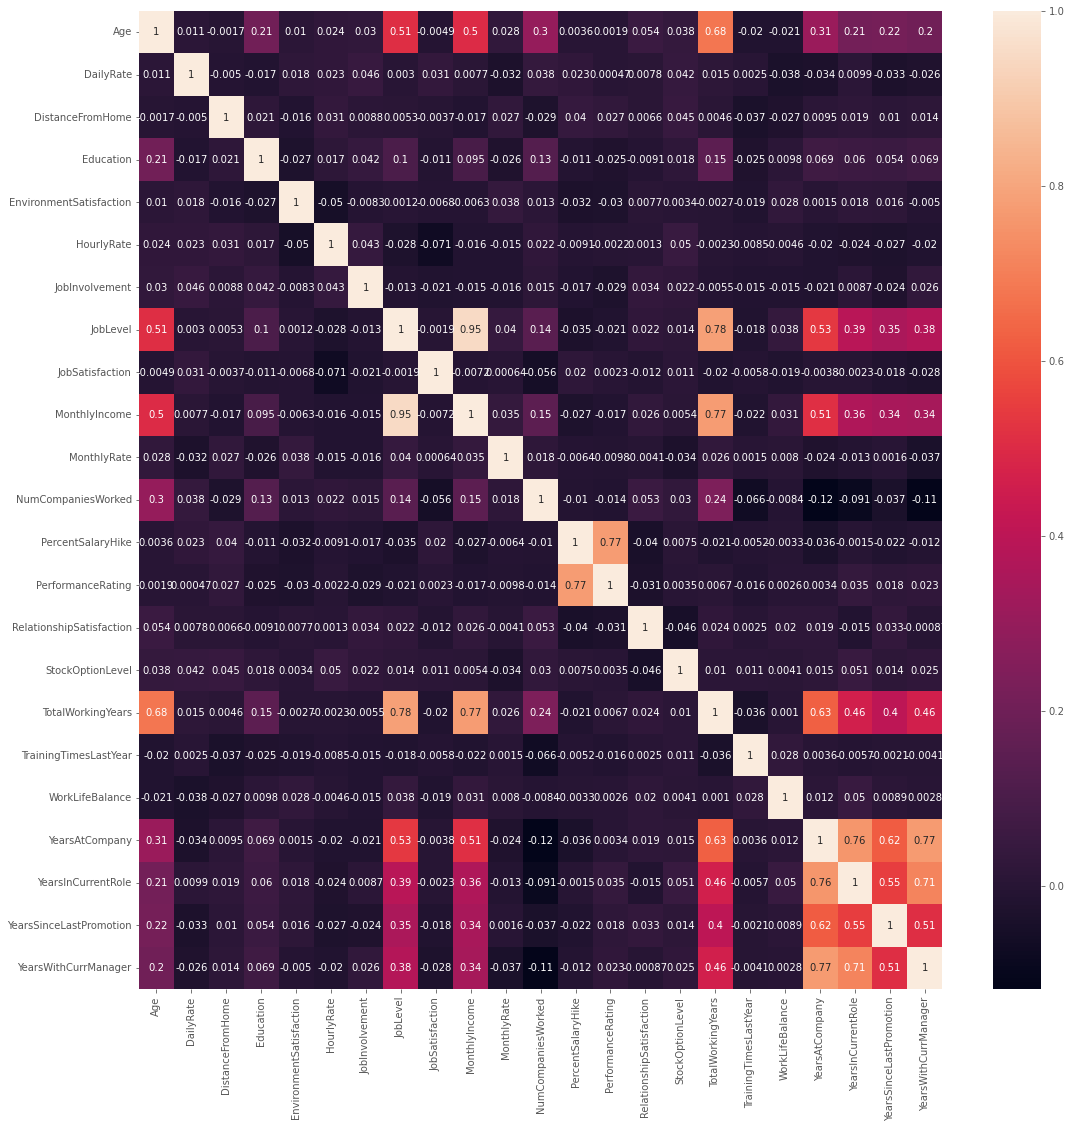

In [96]:
plt.figure(figsize=(18,18))
sns.heatmap(corr,annot=True,annot_kws={"size":10})

In [97]:
# job level and monthly income 0.95 corr degree
# job level and total working years 0.78
# monthly income and total working year 0.77
# percent salary hike and performance rating 0.77

In [98]:
# yearsatcompany & years current role 0.76
# year at company & years with current manager 0.77

In [99]:
df.drop(['JobLevel',"MonthlyIncome","PercentSalaryHike"],axis=1,inplace=True)

In [100]:
df.drop(["YearsAtCompany"],axis=1,inplace=True)

<AxesSubplot:>

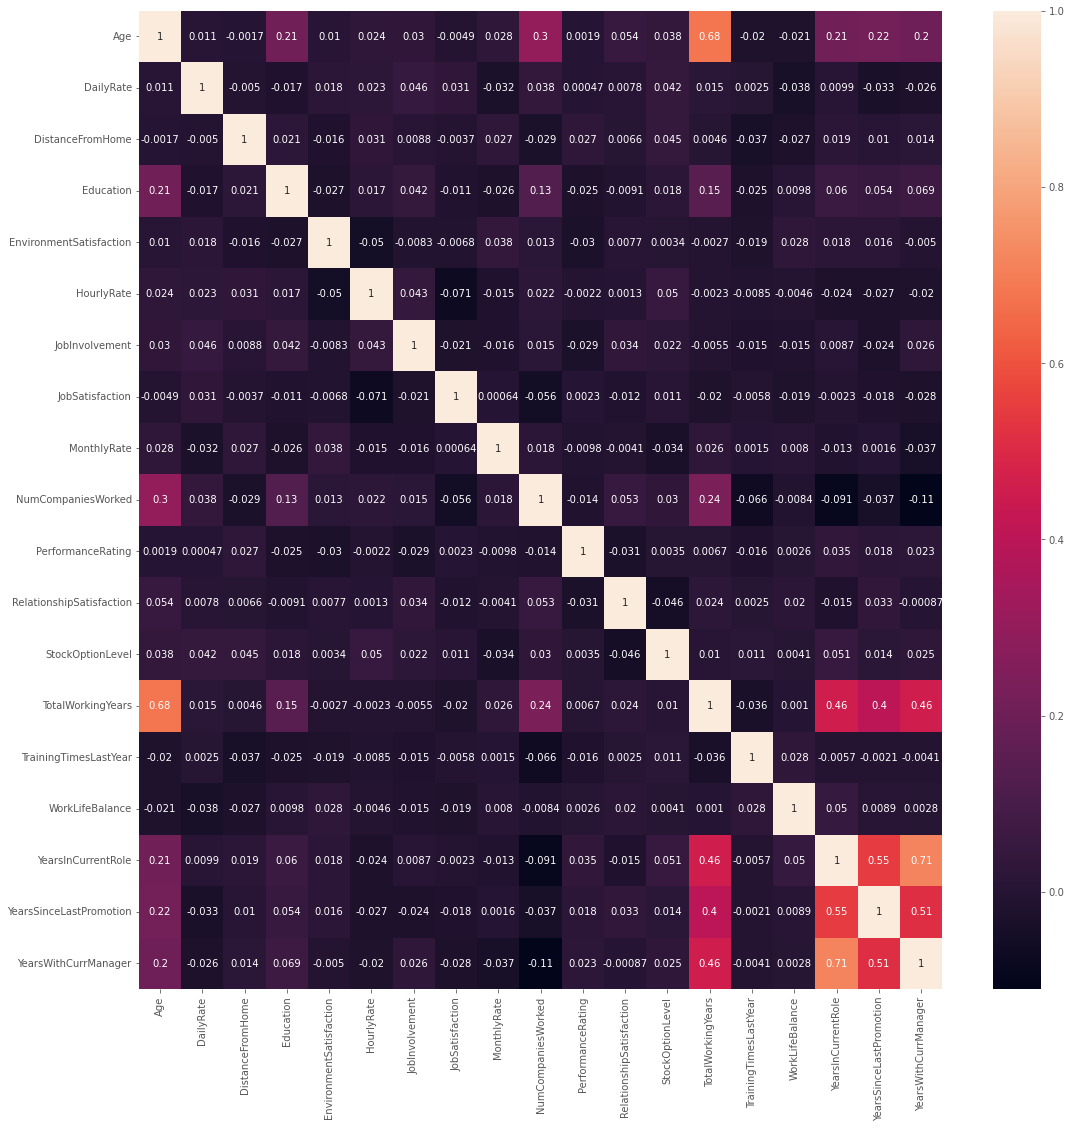

In [101]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,annot_kws={"size":10})

In [1]:
df.head()

NameError: name 'df' is not defined

In [102]:
df.shape

(2940, 27)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EnvironmentSatisfaction   2940 non-null   int64 
 9   Gender                    2940 non-null   object
 10  HourlyRate                2940 non-null   int64 
 11  JobInvolvement            2940 non-null   int64 
 12  JobRole                   2940 non-null   object
 13  JobSatisfaction           2940 non-null   int64 
 14  MaritalStatus           

In [104]:
# many a columns are object type

## Outlier Removal

Age                            AxesSubplot(0.125,0.787927;0.133621x0.0920732)
DailyRate                   AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
DistanceFromHome             AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
Education                   AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
EnvironmentSatisfaction     AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
HourlyRate                     AxesSubplot(0.125,0.677439;0.133621x0.0920732)
JobInvolvement              AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
JobSatisfaction              AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
MonthlyRate                 AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
NumCompaniesWorked          AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
PerformanceRating              AxesSubplot(0.125,0.566951;0.133621x0.0920732)
RelationshipSatisfaction    AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
StockOptionLevel             AxesSubplot(0.44569,0.566951;0.1336

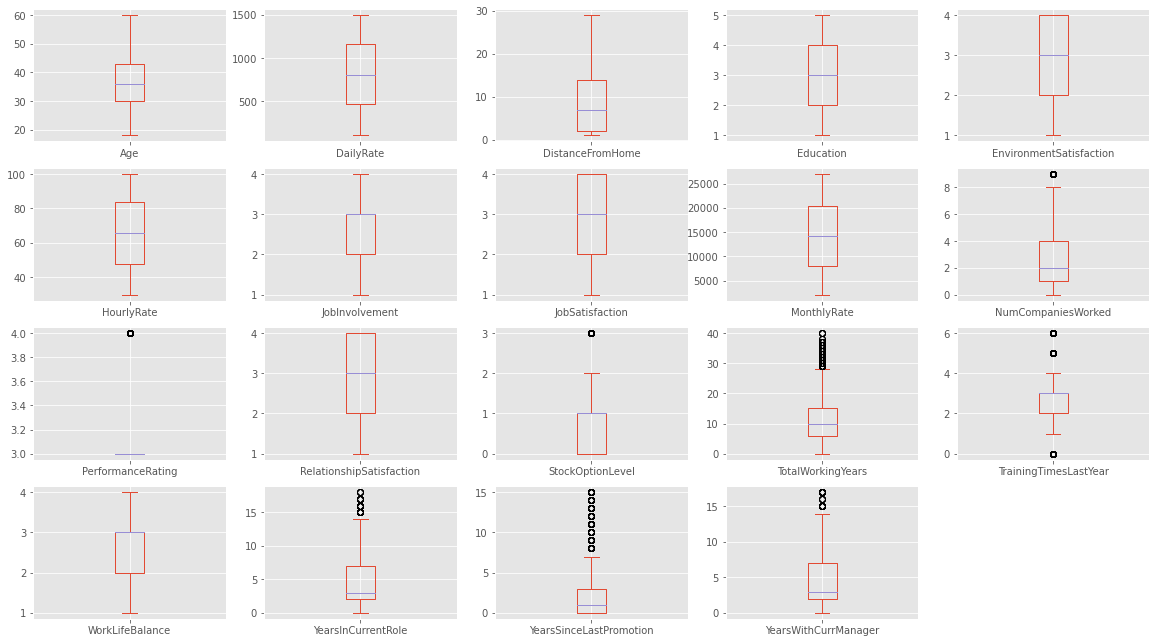

In [105]:
df.plot(kind="box", subplots=True, layout=(7,5),figsize=(20,20))

In [106]:
################ CLIPPING OF OUTLIERS######################

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)
LF=Q1 - 1.5 * IQR
UF=Q3 + 1.5 * IQR
dict1=dict(IQR)
num_cols=list(dict1.keys())
df[num_cols]=np.where(df[num_cols]>UF,UF,np.where(df[num_cols]<LF,LF,df[num_cols])) 
df


# Q1=data.quantile(0.25)
# Q3=data.quantile(0.75)
# IQR=Q3-Q1
# #print(IQR)
# UF=Q3+1.5*IQR
# LF=Q1-1.5*IQR
# print(UF)
# print(LF)
# IQR_outliers = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)] 

#IQR_outliers

Age                            13.0
DailyRate                     692.0
DistanceFromHome               12.0
Education                       2.0
EnvironmentSatisfaction         2.0
HourlyRate                     36.0
JobInvolvement                  1.0
JobSatisfaction                 2.0
MonthlyRate                 12417.0
NumCompaniesWorked              3.0
PerformanceRating               0.0
RelationshipSatisfaction        2.0
StockOptionLevel                1.0
TotalWorkingYears               9.0
TrainingTimesLastYear           1.0
WorkLifeBalance                 1.0
YearsInCurrentRole              5.0
YearsSinceLastPromotion         3.0
YearsWithCurrManager            5.0
dtype: float64


Age Attrition     BusinessTravel  DailyRate              Department  \
0     41.0       Yes      Travel_Rarely     1102.0                   Sales   
1     49.0        No  Travel_Frequently      279.0  Research & Development   
2     37.0       Yes      Travel_Rarely     1373.0  Research & Development   
3     33.0        No  Travel_Frequently     1392.0  Research & Development   
4     27.0        No      Travel_Rarely      591.0  Research & Development   
...    ...       ...                ...        ...                     ...   
2935  36.0        No  Travel_Frequently      884.0  Research & Development   
2936  39.0        No      Travel_Rarely      613.0  Research & Development   
2937  27.0        No      Travel_Rarely      155.0  Research & Development   
2938  49.0        No  Travel_Frequently     1023.0                   Sales   
2939  34.0        No      Travel_Rarely      628.0  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                  1.0        2.0  Life Sciences                      2.0   
1                  8.0        1.0  Life Sciences                      3.0   
2                  2.0        2.0          Other                      4.0   
3                  3.0        4.0  Life Sciences                      4.0   
4                  2.0        1.0        Medical                      1.0   
...                ...        ...            ...                      ...   
2935              23.0        2.0        Medical                      3.0   
2936               6.0        1.0        Medical                      4.0   
2937               4.0        3.0  Life Sciences                      2.0   
2938               2.0        3.0        Medical                      4.0   
2939               8.0        3.0        Medical                      2.0   

      Gender  HourlyRate  JobInvolvement                    JobRole  \
0     Female        94.0             3.0            Sales Executive   
1       Male        61.0             2.0         Research Scientist   
2       Male        92.0             2.0      Laboratory Technician   
3     Female        56.0             3.0         Research Scientist   
4       Male        40.0             3.0      Laboratory Technician   
...      ...         ...             ...                        ...   
2935    Male        41.0             4.0      Laboratory Technician   
2936    Male        42.0             2.0  Healthcare Representative   
2937    Male        87.0             4.0     Manufacturing Director   
2938    Male        63.0             2.0            Sales Executive   
2939    Male        82.0             4.0      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyRate  NumCompaniesWorked OverTime  \
0                 4.0        Single      19479.0                 8.0      Yes   
1                 2.0       Married      24907.0                 1.0       No   
2                 3.0        Single       2396.0                 6.0      Yes   
3                 3.0       Married      23159.0                 1.0      Yes   
4                 2.0       Married      16632.0                 8.5       No   
...               ...           ...          ...                 ...      ...   
2935              4.0       Married      12290.0                 4.0       No   
2936              1.0       Married      21457.0                 4.0       No   
2937              2.0       Married       5174.0                 1.0      Yes   
2938              2.0       Married      13243.0                 2.0       No   
2939              3.0       Married      10228.0                 2.0       No   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                   3.0                       1.0               0.0   
1                   3.0                       4.0               1.0   
2                   3.0                       2.0               0.0   
3                   3.0            

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2940 non-null   float64
 1   Attrition                 2940 non-null   object 
 2   BusinessTravel            2940 non-null   object 
 3   DailyRate                 2940 non-null   float64
 4   Department                2940 non-null   object 
 5   DistanceFromHome          2940 non-null   float64
 6   Education                 2940 non-null   float64
 7   EducationField            2940 non-null   object 
 8   EnvironmentSatisfaction   2940 non-null   float64
 9   Gender                    2940 non-null   object 
 10  HourlyRate                2940 non-null   float64
 11  JobInvolvement            2940 non-null   float64
 12  JobRole                   2940 non-null   object 
 13  JobSatisfaction           2940 non-null   float64
 14  MaritalS

Age                            AxesSubplot(0.125,0.787927;0.133621x0.0920732)
DailyRate                   AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
DistanceFromHome             AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
Education                   AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
EnvironmentSatisfaction     AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
HourlyRate                     AxesSubplot(0.125,0.677439;0.133621x0.0920732)
JobInvolvement              AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
JobSatisfaction              AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
MonthlyRate                 AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
NumCompaniesWorked          AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
PerformanceRating              AxesSubplot(0.125,0.566951;0.133621x0.0920732)
RelationshipSatisfaction    AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
StockOptionLevel             AxesSubplot(0.44569,0.566951;0.1336

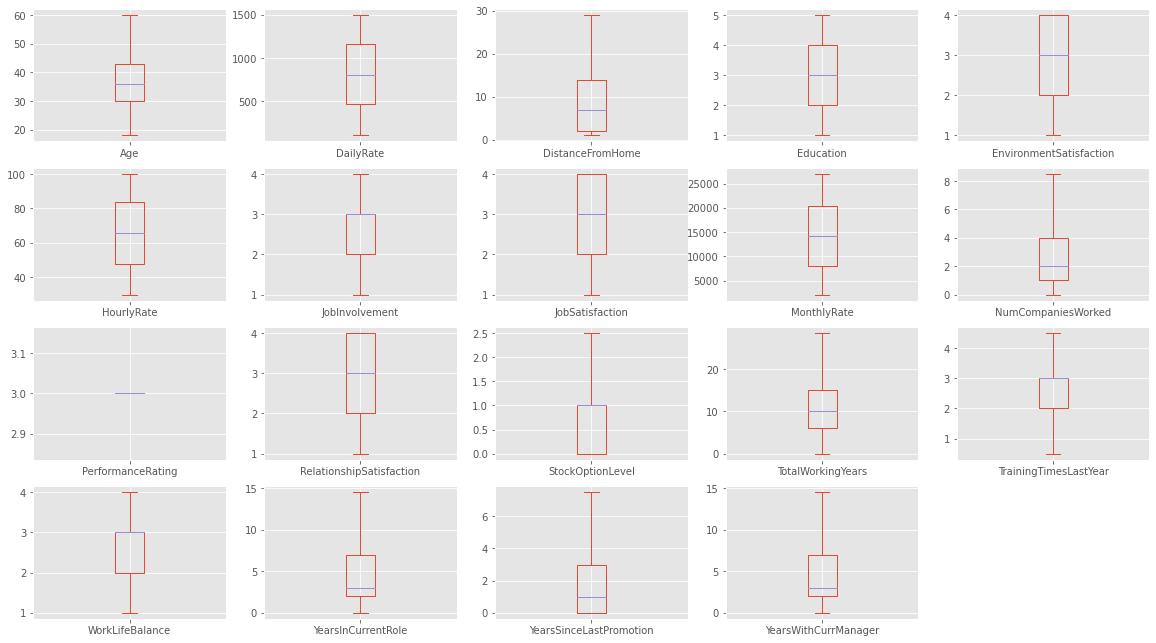

In [108]:
df.plot(kind="box", subplots=True, layout=(7,5),figsize=(20,20))

## Label Encoder

In [109]:

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 
from matplotlib.colors import ListedColormap
from sklearn import metrics  ##confusion matrix and accuracy
from sklearn.metrics import classification_report



In [110]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df["Age"] = le.fit_transform(res_df["Age"])
    res_df["BusinessTravel"] = le.fit_transform(res_df["BusinessTravel"])
    res_df["DailyRate"] = le.fit_transform(res_df["DailyRate"])
    res_df["Department"] = le.fit_transform(res_df["Department"])
    res_df["DistanceFromHome"] = le.fit_transform(res_df["DistanceFromHome"])
    res_df["Education"] = le.fit_transform(res_df["Education"])
    res_df["EducationField"] = le.fit_transform(res_df["EducationField"])
#    res_df["EmployeeCount"] = le.fit_transform(res_df["EmployeeCount"])
#    res_df["EmployeeNumber"] = le.fit_transform(res_df["EmployeeNumber"])
    res_df["EnvironmentSatisfaction"] = le.fit_transform(res_df["EnvironmentSatisfaction"])
    res_df["Gender"] = le.fit_transform(res_df["Gender"])
    res_df["HourlyRate"] = le.fit_transform(res_df['HourlyRate'])
  #  res_df["JobLevel"] = le.fit_transform(res_df["JobLevel"])
    res_df["JobInvolvement"] = le.fit_transform(res_df["JobInvolvement"])
    res_df["JobRole"] = le.fit_transform(res_df["JobRole"])
    res_df["MaritalStatus"] = le.fit_transform(res_df["MaritalStatus"])
#    res_df["MonthlyIncome"] = le.fit_transform(res_df["MonthlyIncome"])
    res_df["OverTime"] = le.fit_transform(res_df["OverTime"])
    res_df["MonthlyRate"] = le.fit_transform(res_df["EducationField"])
    res_df["NumCompaniesWorked"] = le.fit_transform(res_df["NumCompaniesWorked"])
    res_df["OverTime"] = le.fit_transform(res_df["OverTime"])
#    res_df["PercentSalaryHike"] = le.fit_transform(res_df["PercentSalaryHike"])
    res_df["PerformanceRating"] = le.fit_transform(res_df["PerformanceRating"])
    res_df["RelationshipSatisfaction"] = le.fit_transform(res_df['RelationshipSatisfaction'])
    res_df["StockOptionLevel"] = le.fit_transform(res_df["StockOptionLevel"])
   
    res_df["TotalWorkingYears"] = le.fit_transform(res_df["TotalWorkingYears"])
    res_df["TrainingTimesLastYear"] = le.fit_transform(res_df["TrainingTimesLastYear"])
    res_df["WorkLifeBalance"] = le.fit_transform(res_df["WorkLifeBalance"])
 #   res_df["YearsAtCompany"] = le.fit_transform(res_df["YearsAtCompany"])
    res_df["YearsInCurrentRole"] = le.fit_transform(res_df["YearsInCurrentRole"])
    res_df["YearsSinceLastPromotion"] = le.fit_transform(res_df["YearsSinceLastPromotion"])
    res_df["YearsWithCurrManager"] = le.fit_transform(res_df["YearsWithCurrManager"]) 
    
    res_df["Attrition"] = le.fit_transform(res_df["Attrition"])
    return res_df

In [111]:
encoded_df = preprocessor(df)
encoded_df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      23          1               2        624           2                 0   
1      31          0               1        113           1                 7   
2      19          1               2        805           1                 1   
3      15          0               1        820           1                 2   
4       9          0               2        312           1                 1   
...   ...        ...             ...        ...         ...               ...   
2935   18          0               1        494           1                22   
2936   21          0               2        327           1                 5   
2937    9          0               2         39           1                 3   
2938   31          0               1        579           2                 1   
2939   16          0               2        336           1                 7   

      Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0             1               1                        1       0          64   
1             0               1                        2       1          31   
2             1               4                        3       1          62   
3             3               1                        3       0          26   
4             0               3                        0       1          10   
...         ...             ...                      ...     ...         ...   
2935          1               3                        2       1          11   
2936          0               3                        3       1          12   
2937          2               1                        1       1          57   
2938          2               3                        3       1          33   
2939          2               3                        1       1          52   

      JobInvolvement  JobRole  JobSatisfaction  MaritalStatus  MonthlyRate  \
0                  2        7              4.0              2            1   
1                  1        6              2.0              1            1   
2                  1        2              3.0              2            4   
3                  2        6              3.0              1            1   
4                  2        2              2.0              1            3   
...              ...      ...              ...            ...          ...   
2935               3        2              4.0              1            3   
2936               1        0              1.0              1            3   
2937               3        4              2.0              1            1   
2938               1        7              2.0              1            3   
2939               3        2              3.0              1            3   

      NumCompaniesWorked  OverTime  PerformanceRating  \
0                      8         1                  0   
1                      1         0                  0   
2                      6         1                  0   
3                      1         1                  0   
4                      9         0                  0   
...                  ...       ...                ...   
2935                   4         0                  0   
2936                   4         0                  0   
2937                   1         1                  0   
2938                   2         0                  0   
2939                   2         0                  0   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                            0                 0                  8   
1                            3                 1                 10   
2                            1                 0                  7   
3                            2                 0                  8   
4                            3                 1                  6   
...                     

In [115]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [116]:
### We can also do encoding first and then remove outliers

X=encoded_df.loc[:,['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']].values


In [117]:
y=encoded_df['Attrition'].values
y

array([1, 0, 1, ..., 0, 0, 0])

In [118]:
#encoded_df.dtypes
np.unique(y,return_counts = True)
#########  So the data is inbalenced ######

(array([0, 1]), array([2466,  474], dtype=int64))

In [119]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)


In [120]:
## Scaling

In [121]:
## scaling is done to convert the data into standard form 
standard_scaler=StandardScaler()     ## instanciation  
X_train=standard_scaler.fit_transform(X_train)  ## fit and transfrom both on training set
X_test=standard_scaler.transform(X_test)    ## only transform on testing set once we have fitted on training set

In [122]:
np.unique(y_test,return_counts = True)

(array([0, 1]), array([472, 116], dtype=int64))

## Random Forest

In [123]:
## Random Forest

np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2,3,4,6,8,10],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy'],
              }

In [124]:
cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto'}
Time taken in grid search:  367.81


In [126]:
fit_rf.set_params( criterion='entropy', max_depth= 10, max_features= 'auto',bootstrap=True)



RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)

In [128]:
fit_rf.set_params(warm_start=False,oob_score=True)

min_estimators =15
max_estimators = 500

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train,y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

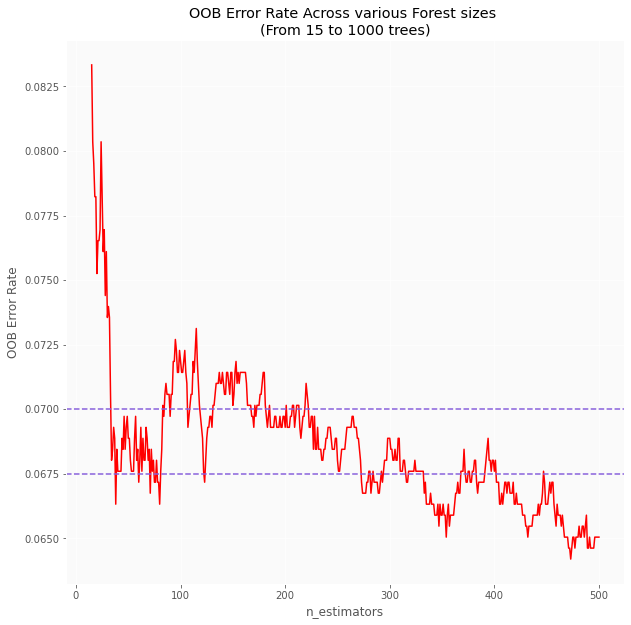

In [130]:
############ THis is used to find how many trees we can take as n estimator wherever the fluctuation is stable we can take 
###### the value in between the stable fluctuation not starting not ending we can take middle one #####
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.0675, color='#875FDB',linestyle='--')
plt.axhline(0.0700, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [131]:
fit_rf.set_params(n_estimators=200,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

fit_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=42)

In [132]:
y_pred=fit_rf.predict(X_test)

In [133]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[470,   2],
       [ 49,  67]], dtype=int64)

In [135]:
y_pred_train = fit_rf.predict(X_train) 
print("Accuracy Training:",metrics.accuracy_score(y_pred_train,y_train))

print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

Accuracy Training: 0.9851190476190477
Precision: 0.9710144927536232
Recall: 0.5775862068965517
Accuracy: 0.9132653061224489


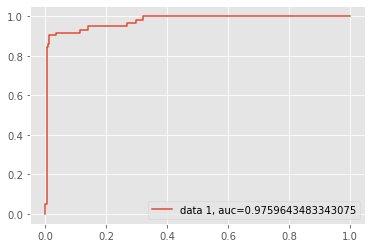

In [136]:
y_pred_proba = fit_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [137]:
X_test.shape

(588, 26)

In [138]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train,return_counts = True))

Y=pd.DataFrame(y)
Y.value_counts()
## as 1 is minority and 0 in majority class which is very higher than class 1 the given data is imbalenced so 
##we will use smote technique to treat this imbalence data

(2352, 26)
(2352,)
(array([0, 1]), array([1994,  358], dtype=int64))


0    2466
1     474
dtype: int64

In [139]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [140]:
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN,BorderlineSMOTE

from imblearn.under_sampling import RandomUnderSampler,NearMiss

smote=SMOTE()
under=RandomUnderSampler()

## SMOTE

In [142]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

print(X_train_smote.shape)
print(y_train_smote.shape)
np.unique(y_train_smote,return_counts = True)

Y=pd.DataFrame(y_train_smote)
print(Y.value_counts())

(3988, 26)
(3988,)
0    1994
1    1994
dtype: int64


In [143]:
fit_rf.fit(X_train_smote,y_train_smote)

y_pred_imb=fit_rf.predict(X_test)

y_pred_imb

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [144]:
from sklearn import metrics
print(metrics.accuracy_score(y_pred_imb,y_test))
print(metrics.precision_score(y_pred_imb,y_test))
print(metrics.recall_score(y_pred_imb,y_test))

0.9421768707482994
0.7413793103448276
0.9555555555555556


In [145]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_pred_imb,y_test))

print(classification_report(y_pred_imb,y_test))

[[468  30]
 [  4  86]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       498
           1       0.74      0.96      0.83        90

    accuracy                           0.94       588
   macro avg       0.87      0.95      0.90       588
weighted avg       0.95      0.94      0.95       588



## UNDERSAMPLING

In [146]:
X_train_under,y_train_under=under.fit_resample(X_train,y_train)

X_train_under.shape

y_train_under.shape

print(np.unique(y_train_under,return_counts=True))
print(np.unique(y_train,return_counts=True))

(array([0, 1]), array([358, 358], dtype=int64))
(array([0, 1]), array([1994,  358], dtype=int64))


In [147]:
fit_rf.fit(X_train_under,y_train_under)


y_pred_under=fit_rf.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_pred_under,y_test))
print(metrics.precision_score(y_pred_under,y_test))
print(metrics.recall_score(y_pred_under,y_test))

print(classification_report(y_pred_under,y_test))

0.8605442176870748
0.8879310344827587
0.5988372093023255
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       416
           1       0.89      0.60      0.72       172

    accuracy                           0.86       588
   macro avg       0.87      0.78      0.81       588
weighted avg       0.86      0.86      0.85       588

